# Departamento de vendas

- Projeto de Data Science para previsão de vendas;

- Base de dados: https://www.kaggle.com/c/rossmann-store-sales/data

* Para que as empresas sejam competitivas e crescerem, o uso de
IA/ML é muito importante para previsões de vendas futuras;

* Modelos de previsão de vendas futuras baseados em dados do
passado devem considerar efeitos sazonais, como por exemplo:
demanda, feriados, promoções e concorrência;

* Neste projeto, vamos trabalhar com dados de 1.115 lojas;

* O objetivo é prever vendas futuras buscando os seguintes benefícios:


1.  Gestão de Estoque Eficiente;
2.  Planejamento Financeiro;
3.  Melhoria na experiência do cliente;
4.  Gestão de Pessoal;
5.  Estratégias de Marketing Mais Eficazes;
6.  Negociações com Fornecedores;
7.  Adaptação a Mudanças no Mercado;
8.  Redução de Desperdícios;
9.  Tomada de Decisões Estratégicas;
10. Competitividade no Mercado.






## Importação das bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

### Dados das vendas

**Dados das transações:**

• Id: identificador da transação (loja + data)

• Loja: identificador único da loja

• Sales: vendas/dia (objetivo)

• Customers: número de clientes no dia

• Open: boleano que indica se a loja estava aberta ou
fechada (1 = aberta, 0 = fechada)

• Promo: se existe uma promoção no dia

• StateHoliday: feriado (a = feriado
público, b = Páscoa, c = Natal, 0 = nenhum)

• SchoolHoliday: feriado escolar


In [2]:
# Importação dos dados relacionados às vendas

sales_train_df = pd.read_csv('/content/train.csv')

<ipython-input-2-271db445cb82>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_df = pd.read_csv('/content/train.csv')


In [3]:
sales_train_df.shape

(1017209, 9)

In [4]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Análise de dados únicos por atributo

In [5]:
sales_train_df['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [6]:
sales_train_df['Open'].unique()

array([1, 0])

In [7]:
sales_train_df['Promo'].unique()

array([1, 0])

In [8]:
sales_train_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [9]:
sales_train_df['SchoolHoliday'].unique()

array([1, 0])

In [10]:
sales_train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [11]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [12]:
# setando o formato do números para serem visualizados na função describe
pd.set_option('display.float_format', '{:.2f}'.format)
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.18
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.38
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,1.00


### Dados das lojas

• StoreType: tipo da loja (a, b, c, d)

• Assortment: a = basic, b = extra, c = extended

• CompetitionDistance (metros): distância para a loja
concorrente mais perto

• CompetitionOpenSince [Month/Year]: data que a loja
concorrente foi aberta

• Promo2: promoção contínua e consecutiva em algumas lojas
(0 = não está participando, 1 = está participando)

• Promo2Since [Year/Week]: data quando a loja começou a
participar da Promo2

• PromoInterval: intervalos consecutivos que a Promo2 é
iniciada (meses). Exemplo: "Feb,May,Aug,Nov" indica que
cada “round” da promoção começa em
February, May, August, November

In [13]:
store_info_df = pd.read_csv('/content/store.csv')

In [14]:
store_info_df.shape

(1115, 10)

In [15]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN
1,2,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.00,12.00,2006.00,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
3,4,c,c,620.00,9.00,2009.00,0,NaN,NaN,NaN
4,5,a,a,29910.00,4.00,2015.00,0,NaN,NaN,NaN


In [16]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Temos atributos com dados nulos nesse dataset de store_info_df

In [17]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00,1112.00,761.00,761.00,1115.00,571.00,571.00
mean,558.00,5404.90,7.22,2008.67,0.51,23.60,2011.76
std,322.02,7663.17,3.21,6.20,0.50,14.14,1.67
min,1.00,20.00,1.00,1900.00,0.00,1.00,2009.00
25%,279.50,717.50,4.00,2006.00,0.00,13.00,2011.00
50%,558.00,2325.00,8.00,2010.00,1.00,22.00,2012.00
75%,836.50,6882.50,10.00,2013.00,1.00,37.00,2013.00
max,1115.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


## Exploração dos dados

### Dados das vendas

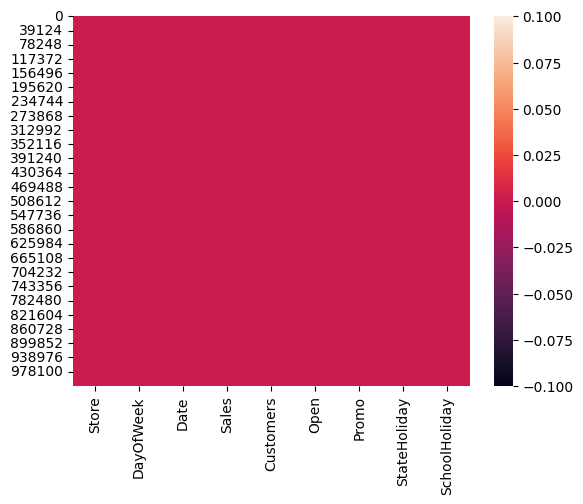

In [18]:
# Verificando se há dados nulos

sns.heatmap(sales_train_df.isnull());

In [19]:
sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

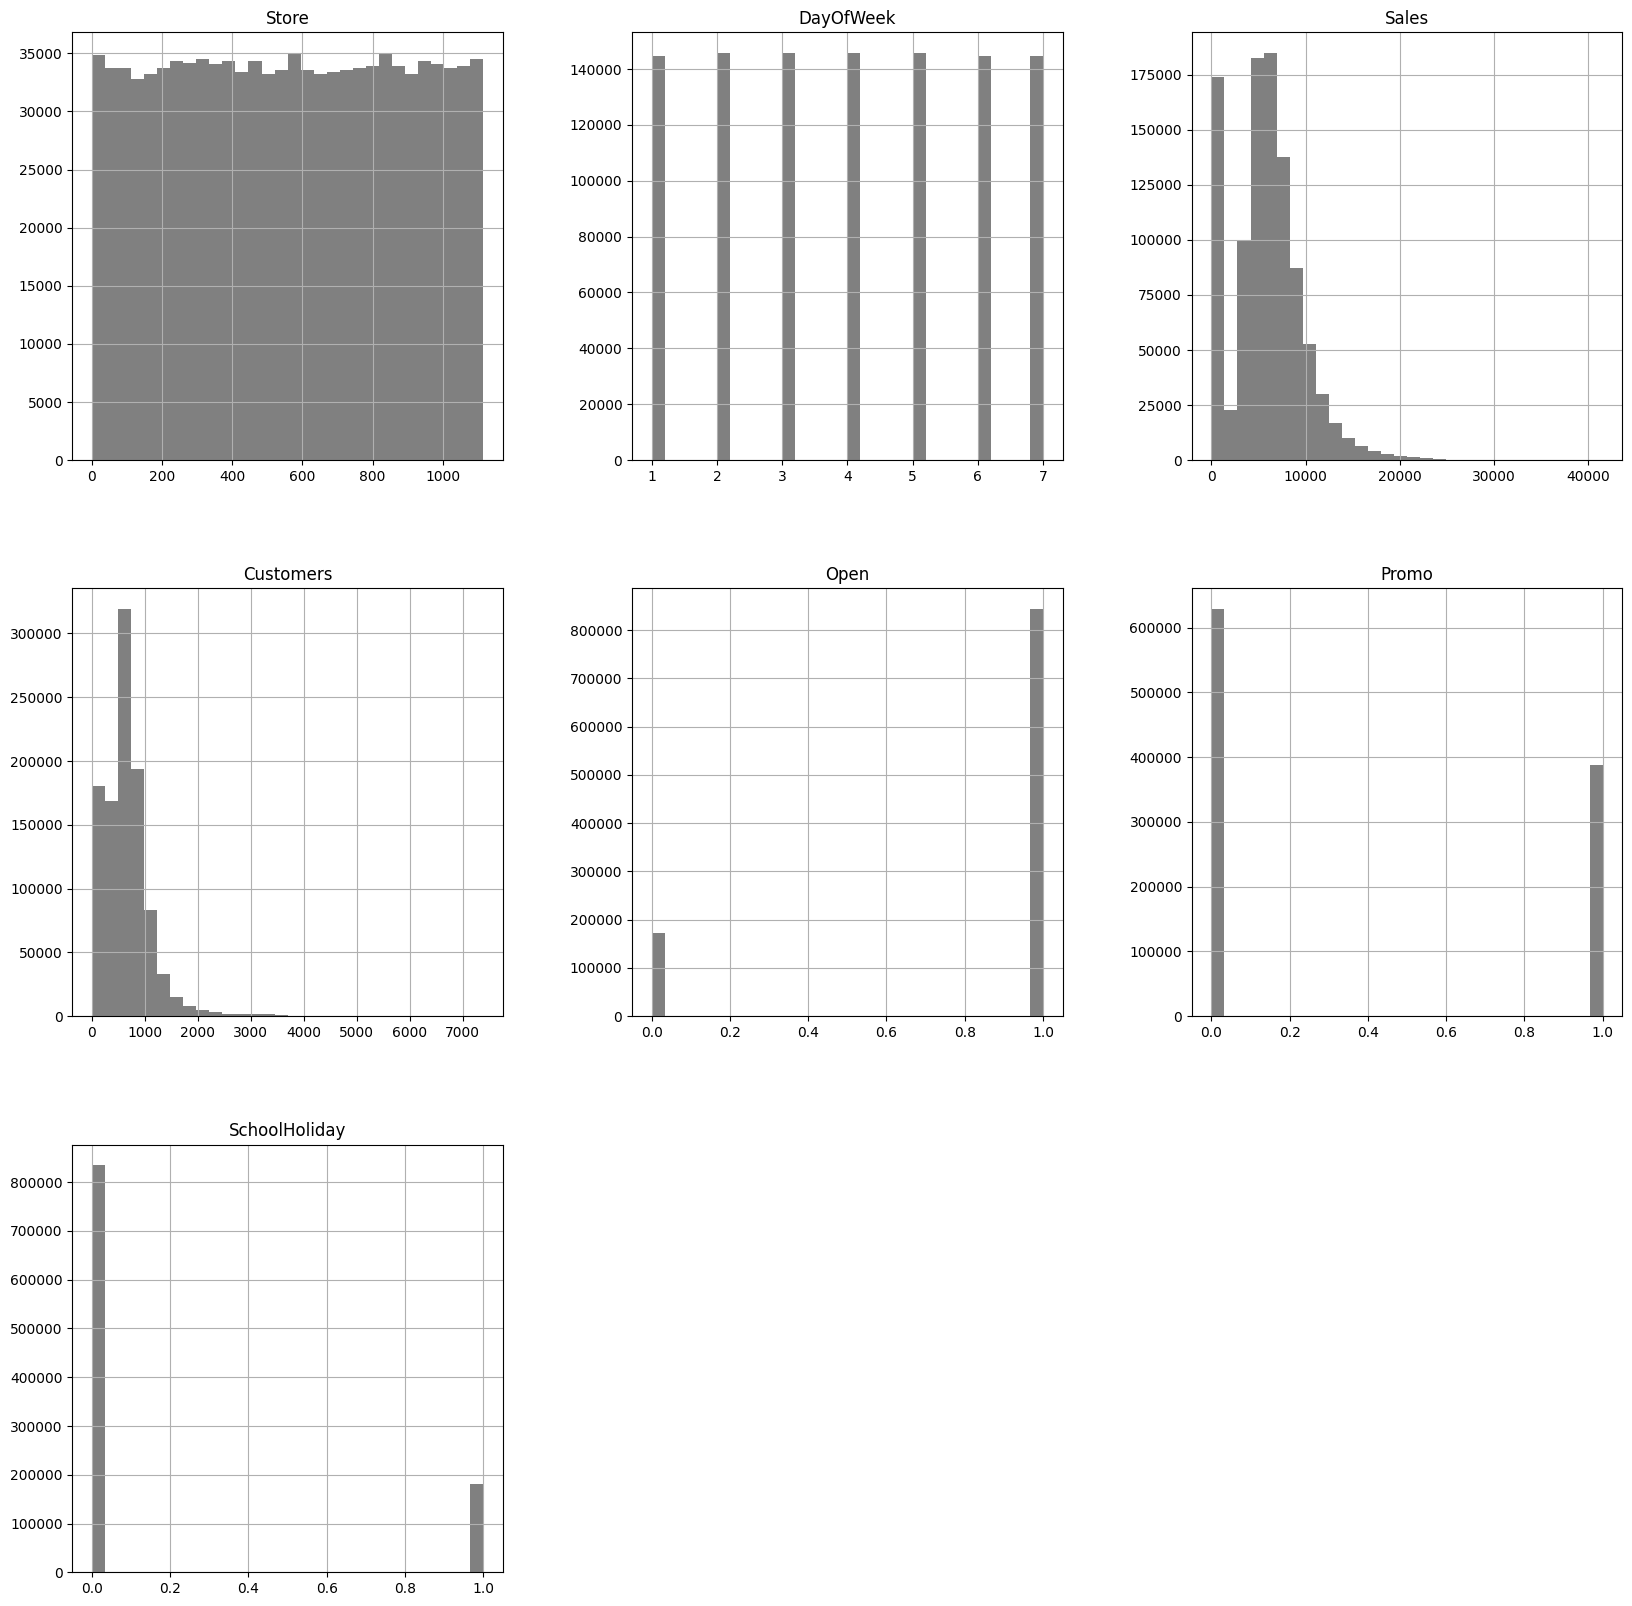

In [20]:
# Analisando a distribuição dos dados
sales_train_df.hist(bins = 30, figsize=(20, 20), color = 'gray');

In [21]:
sales_train_df['Customers'].max()

7388

In [22]:
# Dividindo o dataset de vendas original em dois
# dias de lojas abertas e dias de lojas fechadas

open_train_df = sales_train_df[sales_train_df['Open'] == 1]
closed_train_df = sales_train_df[sales_train_df['Open'] == 0]

In [23]:
print('Total = ', len(sales_train_df))
print('Número de lojas/dias fechado = ', len(closed_train_df))
print('Número de lojas/dias aberto = ', len(open_train_df))

Total =  1017209
Número de lojas/dias fechado =  172817
Número de lojas/dias aberto =  844392


In [24]:
# Dividindo o número de lojas/dias fechados pela quantidade de lojas
# temos uma estimativa melhor da quantidade de dias de lojas fechadas

172817 / len(store_info_df)

154.99282511210762

In [25]:
# Lojas fechadas não fazem transações, portando não há vendas

closed_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1


In [26]:
# Como não há vendas em dias de lojas fechadas, vou criar novo dataset
# somente com dados de dias de lojas abertas, para que as médias não sejam afetadas

sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [27]:
sales_train_df.shape

(844392, 9)

In [28]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [29]:
# Retirei o atributo Open por não ser mais necessário

sales_train_df.drop(['Open'], axis = 1, inplace=True)

<ipython-input-29-b981c19f7584>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_train_df.drop(['Open'], axis = 1, inplace=True)


In [30]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [31]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.00,844392.00,844392.00,844392.00,844392.00,844392.00
mean,558.42,3.52,6955.51,762.73,0.45,0.19
std,321.73,1.72,3104.21,401.23,0.50,0.40
min,1.00,1.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,4859.00,519.00,0.00,0.00
50%,558.00,3.00,6369.00,676.00,0.00,0.00
75%,837.00,5.00,8360.00,893.00,1.00,0.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00


### Dados das lojas

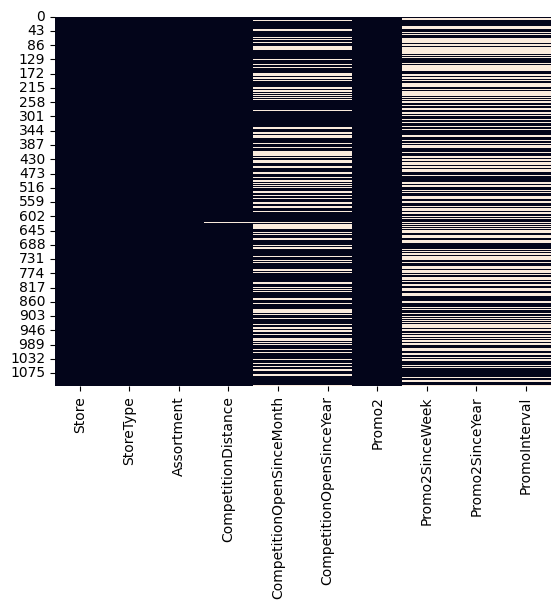

In [32]:
# Analisando dados nulos

sns.heatmap(store_info_df.isnull(), cbar=False);

In [33]:
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.00,2013.00,"Feb,May,Aug,Nov"


In [34]:
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.00,NaN,NaN,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
12,13,d,a,310.00,NaN,NaN,1,45.00,2009.00,"Feb,May,Aug,Nov"
15,16,a,c,3270.00,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.00,NaN,NaN,1,22.00,2011.00,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.00,NaN,NaN,1,22.00,2012.00,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.00,NaN,NaN,1,10.00,2014.00,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.00,NaN,NaN,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.00,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.00,NaN,NaN,0,NaN,NaN,NaN


In [35]:
store_info_df[store_info_df['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.00,NaN,NaN,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
12,13,d,a,310.00,NaN,NaN,1,45.00,2009.00,"Feb,May,Aug,Nov"
15,16,a,c,3270.00,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.00,NaN,NaN,1,22.00,2011.00,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.00,NaN,NaN,1,22.00,2012.00,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.00,NaN,NaN,1,10.00,2014.00,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.00,NaN,NaN,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.00,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.00,NaN,NaN,0,NaN,NaN,NaN


In [36]:
# Promo2SinceYear, Promo2SinceYear e PromoInterval são nulos quando Promo2 é zero

store_info_df[store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN
3,4,c,c,620.00,9.00,2009.00,0,NaN,NaN,NaN
4,5,a,a,29910.00,4.00,2015.00,0,NaN,NaN,NaN
5,6,a,a,310.00,12.00,2013.00,0,NaN,NaN,NaN
6,7,a,c,24000.00,4.00,2013.00,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.00,4.00,2004.00,0,NaN,NaN,NaN
1109,1110,c,c,900.00,9.00,2010.00,0,NaN,NaN,NaN
1111,1112,c,c,1880.00,4.00,2006.00,0,NaN,NaN,NaN
1112,1113,a,c,9260.00,NaN,NaN,0,NaN,NaN,NaN


In [37]:
# Para os atributos abaixo não faz sentido incluir média ou mediana
# Atributos preenchidos com zero

str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
            'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for str in str_cols:
  store_info_df[str].fillna(0, inplace=True)

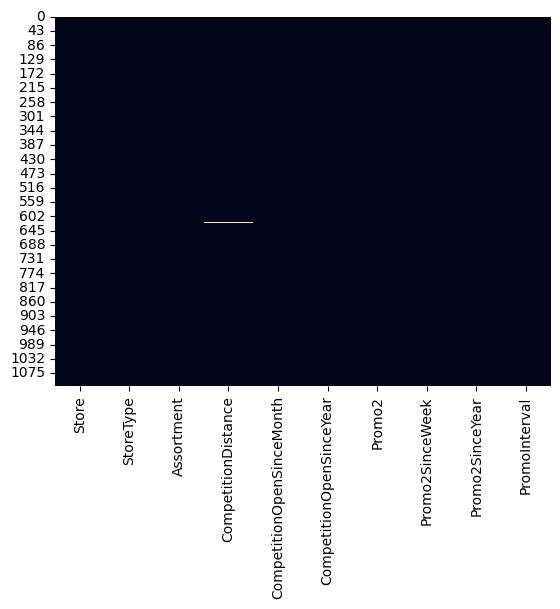

In [38]:
sns.heatmap(store_info_df.isnull(), cbar = False);

In [39]:
# Diferentemente dos outros atributos com dados nulos, no CompetitionDistance decidi
# preencher com a média, uma vez que traz a distância do concorrente

store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace = True)

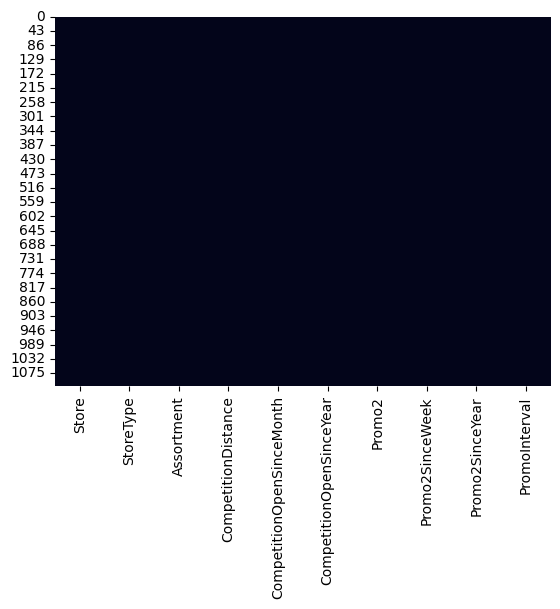

In [40]:
sns.heatmap(store_info_df.isnull(), cbar = False);

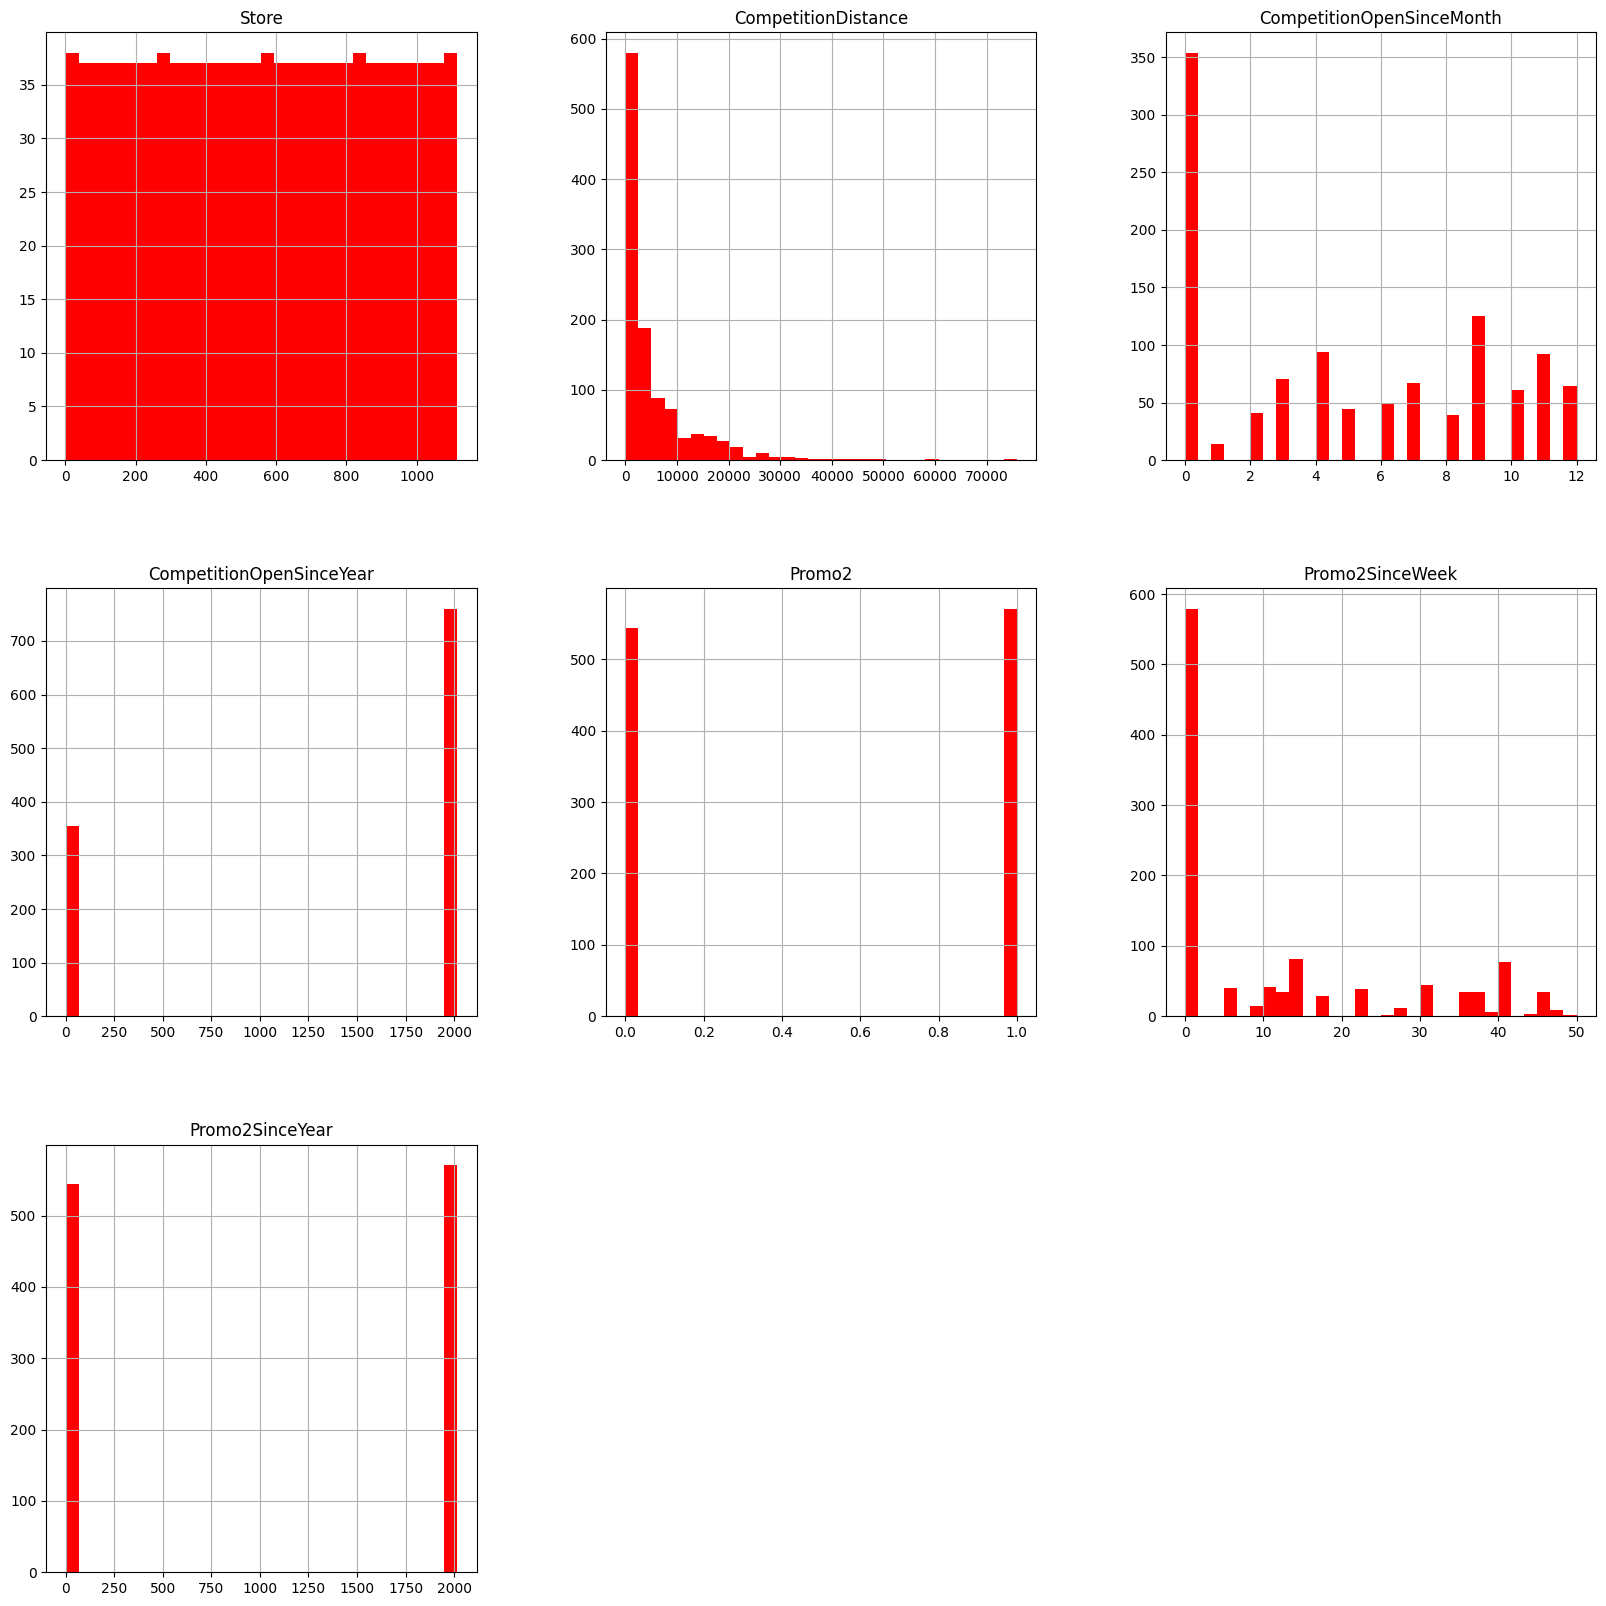

In [41]:
# Analisando a distribuição dos atributos

store_info_df.hist(bins = 30, figsize=(20,20), color = 'r');

### Dados unidos (vendas + lojas)

In [42]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [43]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0
1,2,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.00,12.00,2006.00,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
3,4,c,c,620.00,9.00,2009.00,0,0.00,0.00,0
4,5,a,a,29910.00,4.00,2015.00,0,0.00,0.00,0


In [44]:
# Realizando o merge dos dois datasets pelo atributo 'Store'

sales_train_all_df = pd.merge(sales_train_df, store_info_df, how = 'inner', on = 'Store')

In [45]:
sales_train_all_df.shape

(844392, 17)

In [46]:
sales_train_all_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.00,6.00,2009.00,0,0.00,0.00,0
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.00,6.00,2009.00,0,0.00,0.00,0
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.00,6.00,2009.00,0,0.00,0.00,0
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.00,6.00,2009.00,0,0.00,0.00,0
844391,292,3,2013-01-02,5076,672,0,0,1,a,a,1100.00,6.00,2009.00,0,0.00,0.00,0


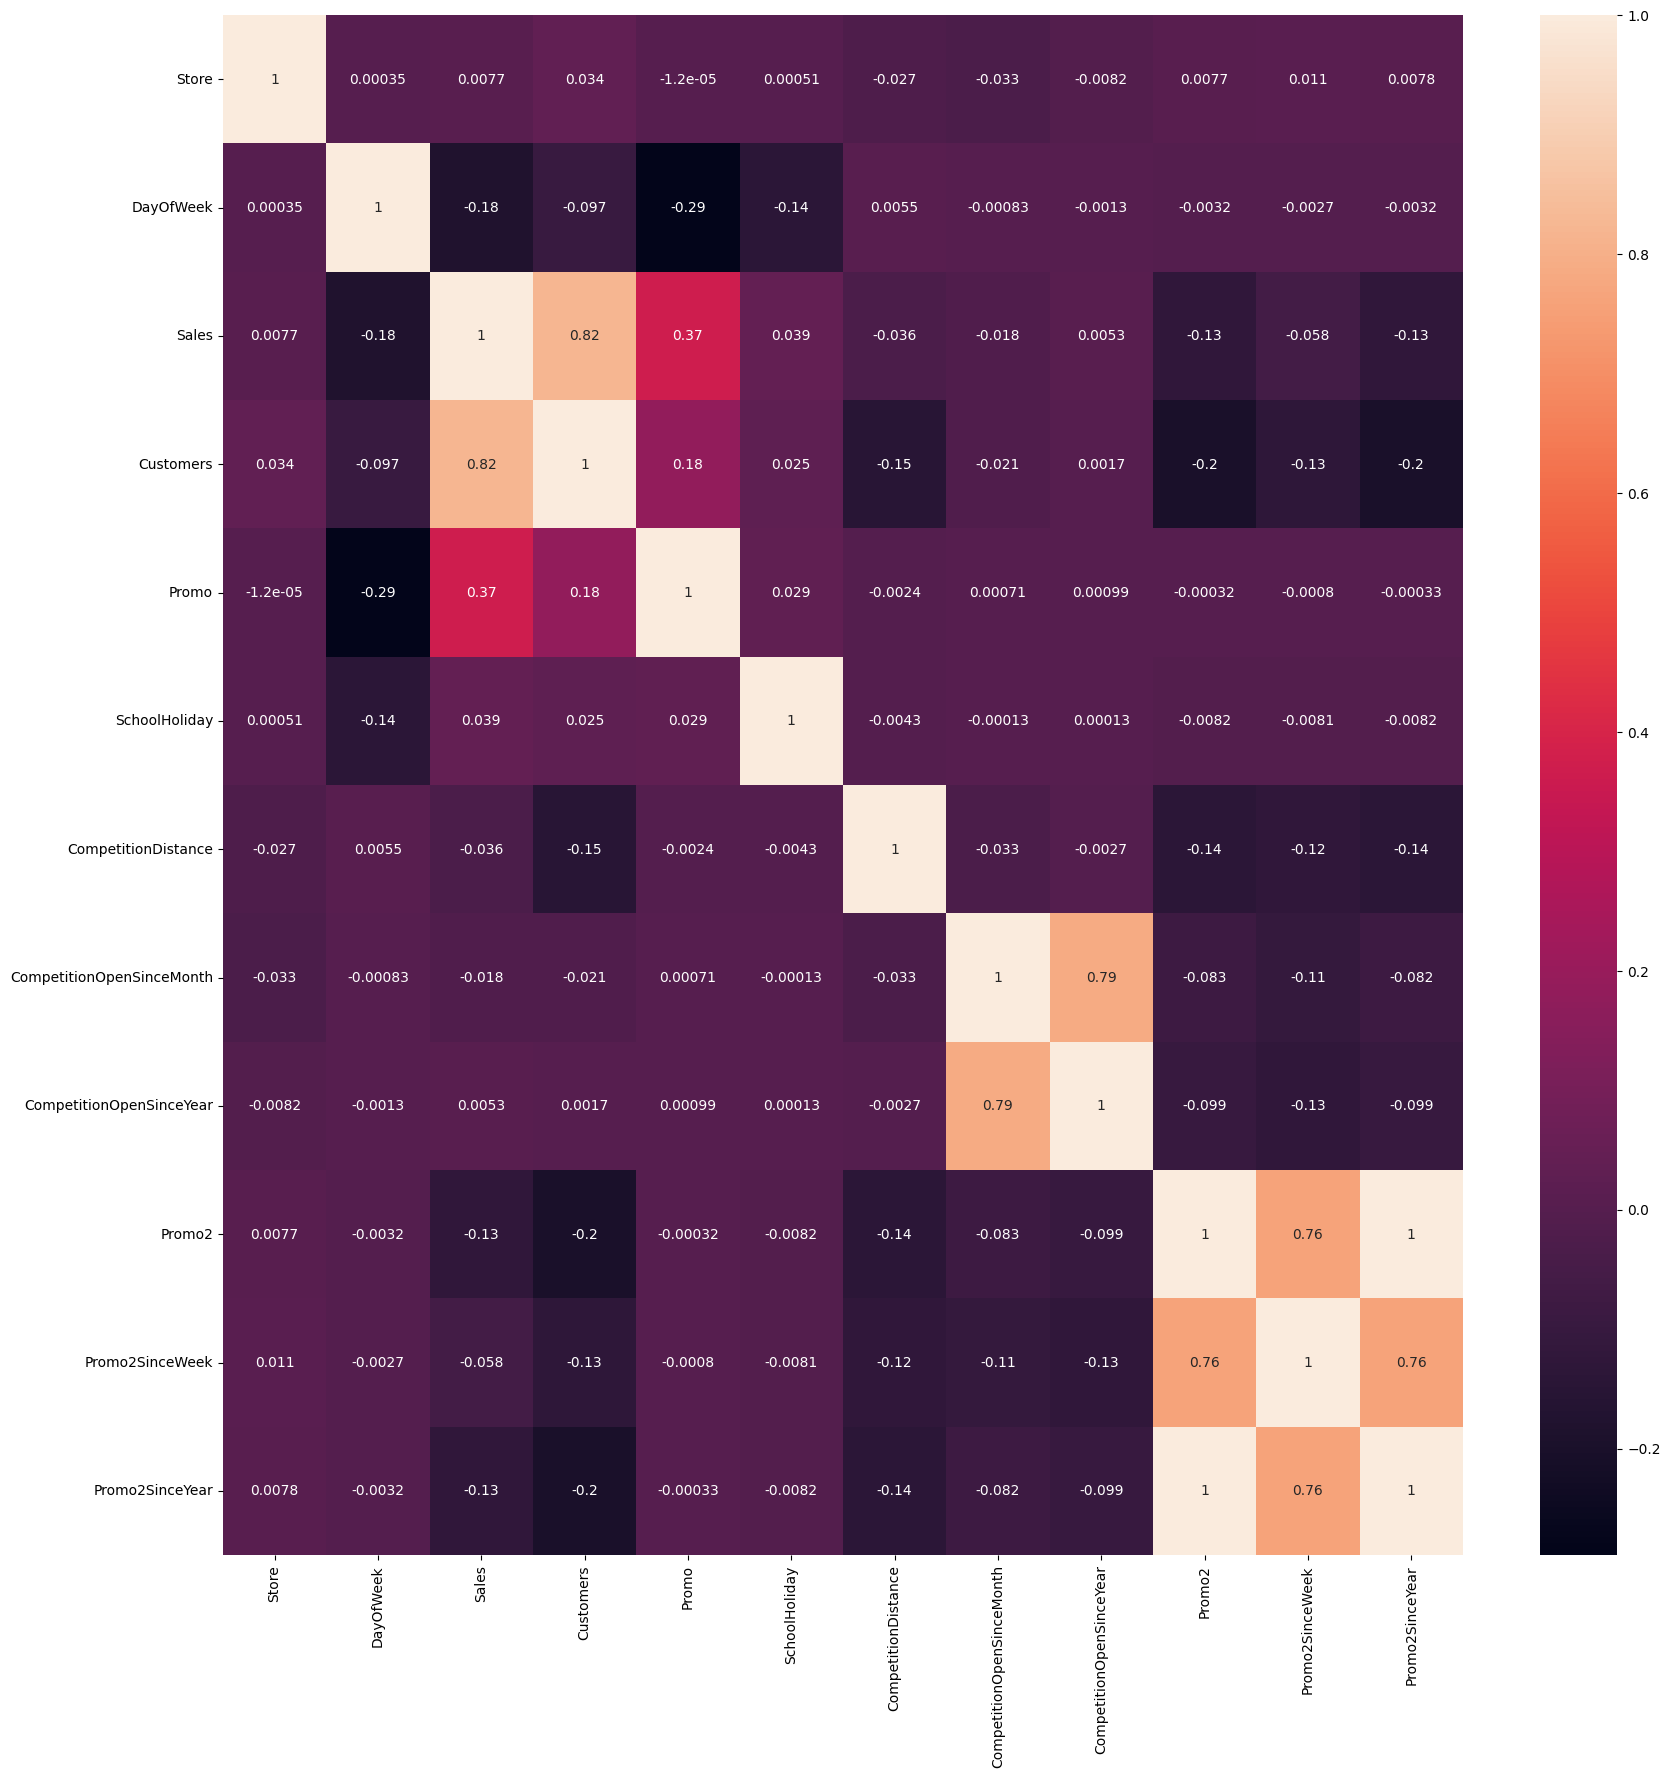

In [47]:
# Analisando a correlação entre variáveis

correlations = sales_train_all_df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot = True);

In [48]:
# Criando ranking de correlação a partir de 'Sales'

correlations = sales_train_all_df.corr(numeric_only=True)['Sales'].sort_values()
correlations

DayOfWeek                   -0.18
Promo2SinceYear             -0.13
Promo2                      -0.13
Promo2SinceWeek             -0.06
CompetitionDistance         -0.04
CompetitionOpenSinceMonth   -0.02
CompetitionOpenSinceYear     0.01
Store                        0.01
SchoolHoliday                0.04
Promo                        0.37
Customers                    0.82
Sales                        1.00
Name: Sales, dtype: float64

Dividindo a data em ano, mês e dia para facilitar a modelagem temporal com o Prophet.
O Prophet utiliza componentes de tendência anual, sazonalidade mensal e semanal
para capturar padrões temporais em séries temporais. Ao dividir a data em
componentes mais granulares, podemos melhorar a capacidade do modelo de identificar
tendências e padrões sazonais específicos, contribuindo para previsões mais precisas
em análises de séries temporais, como previsões de vendas.


In [49]:
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year

In [50]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0,2015
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0,2015
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0,2015
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0,2015
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0,2015


In [51]:
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

In [52]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0,2015,7,27


### Visualização de Dados

Text(0.5, 1.0, 'Média de vendas por mês')

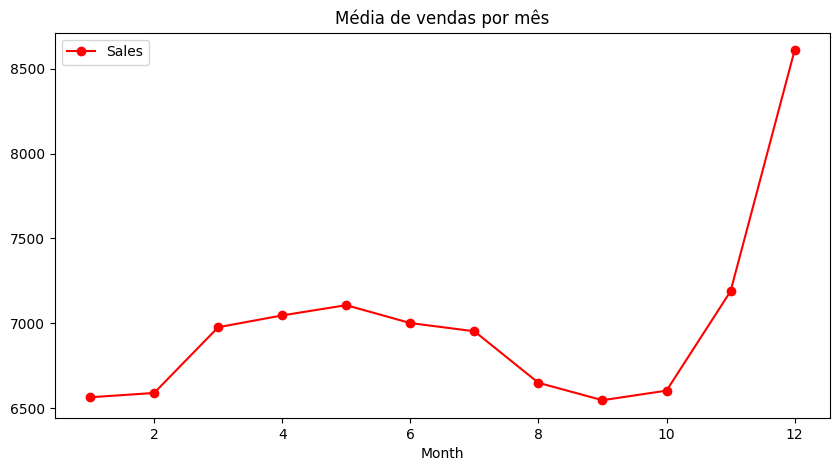

In [53]:
axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por mês')

Text(0.5, 1.0, 'Média de clientes por mês')

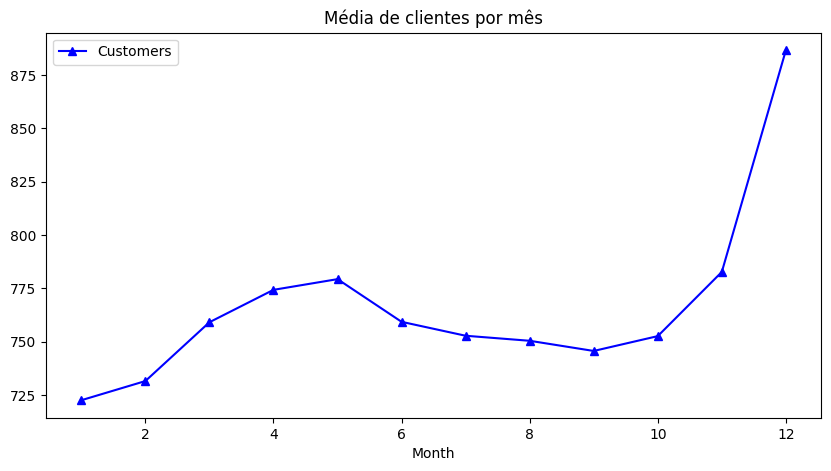

In [54]:
axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por mês')

Text(0.5, 1.0, 'Média de vendas por dia')

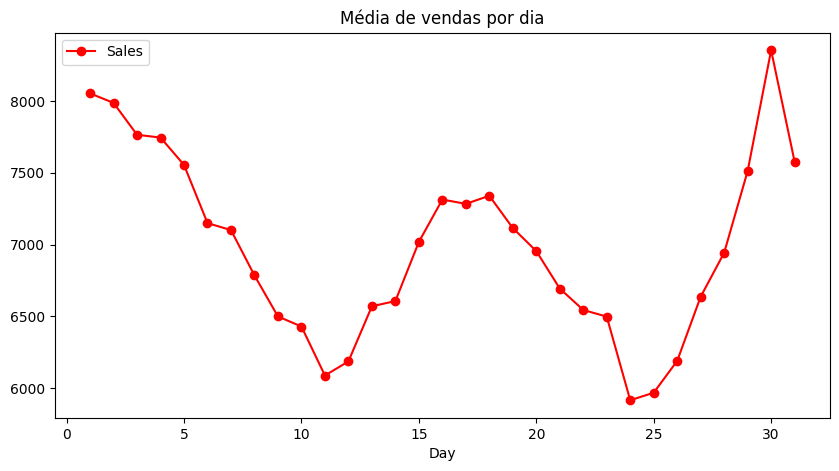

In [55]:
axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por dia')

Text(0.5, 1.0, 'Média de clientes por dia')

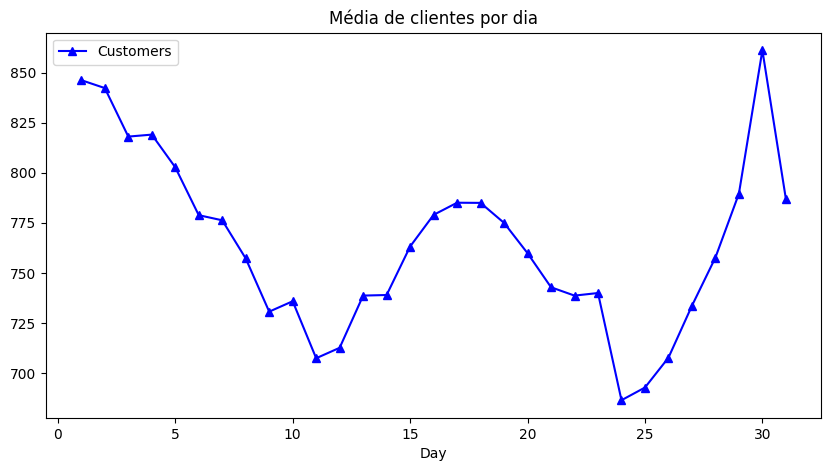

In [56]:
axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por dia')

Text(0.5, 1.0, 'Média de vendas por dia da semana')

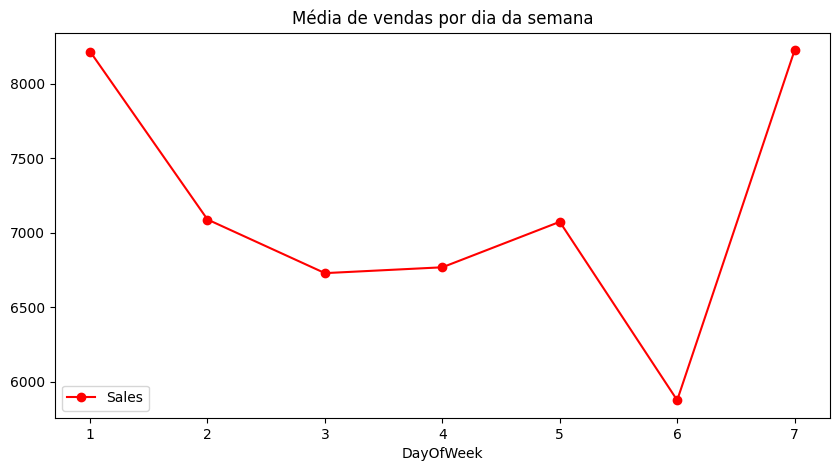

In [57]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por dia da semana')

Text(0.5, 1.0, 'Média de clientes por dia da semana')

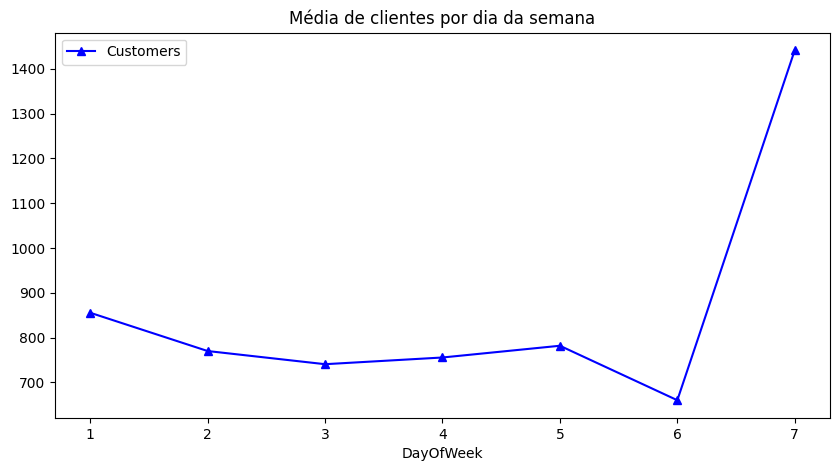

In [58]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por dia da semana')

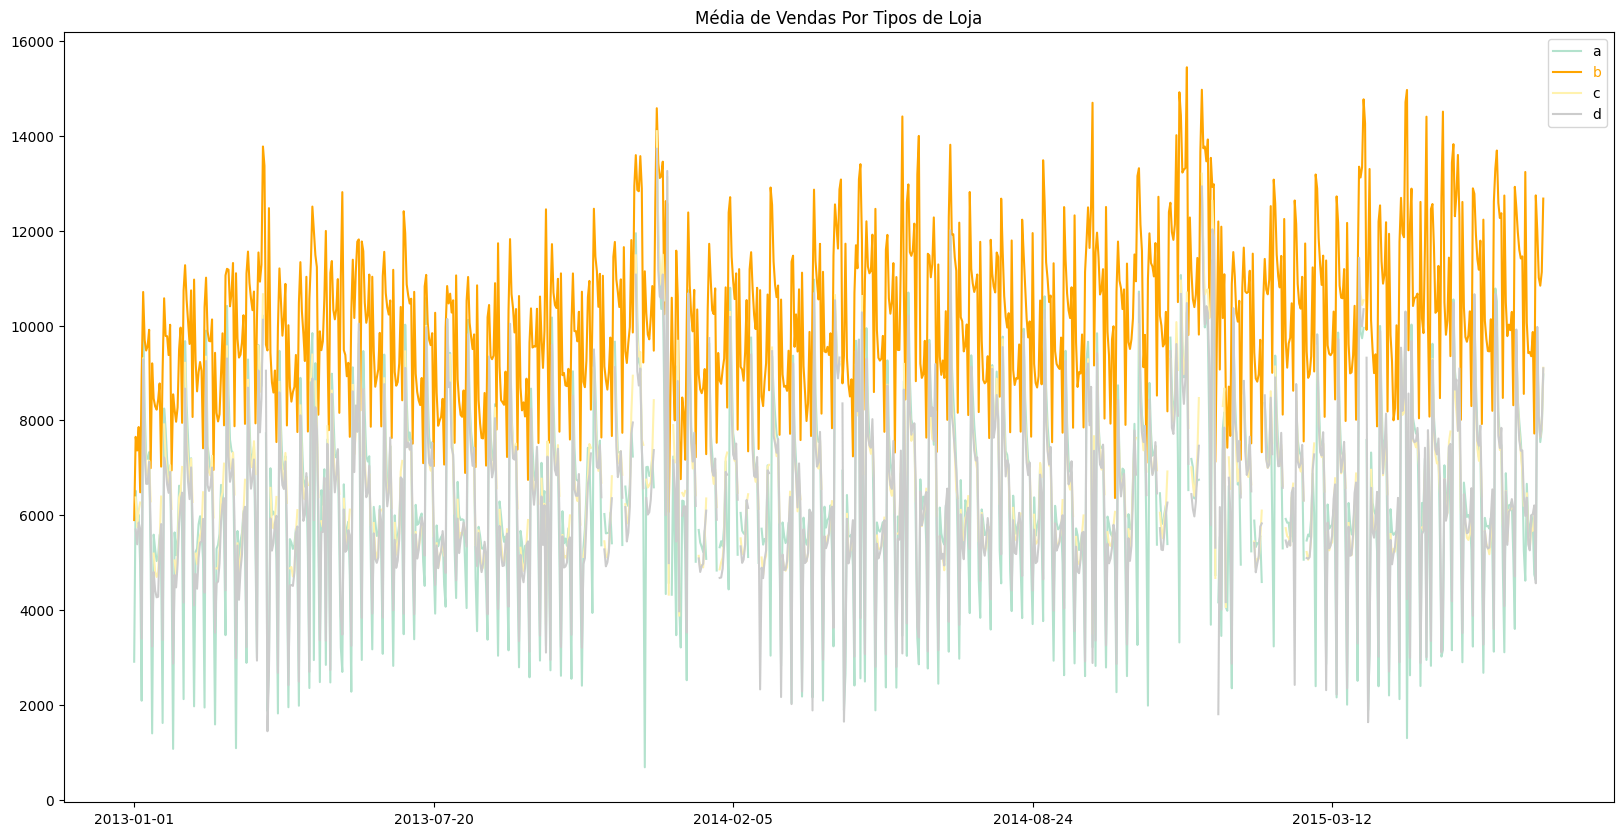

In [59]:
# Gráfico comparando as médias de vendas entre os deiferentes tipos de loja
# Destacando o tipo de loja com melhores médias


fig, ax = plt.subplots(figsize = (20,10))
sales_by_store_type = sales_train_all_df.groupby(['Date', 'StoreType']).mean(numeric_only=True)['Sales'].unstack()
sales_by_store_type.plot(ax=ax, cmap='Pastel2')

# Identifica a loja 'b'
max_store = sales_by_store_type.mean(numeric_only=True).idxmax()

# Configuração de cores contrastantes para a loja 'b'
for i, line in enumerate(ax.lines):
    if line.get_label() == max_store:
        line.set_color('orange')  # Escolha de uma cor contrastante para a loja 'b'
        # Atualiza a cor da legenda para a loja 'b'
        ax.legend().get_texts()[i].set_color('orange')

plt.title('Média de Vendas Por Tipos de Loja')
plt.xlabel('')

plt.show();

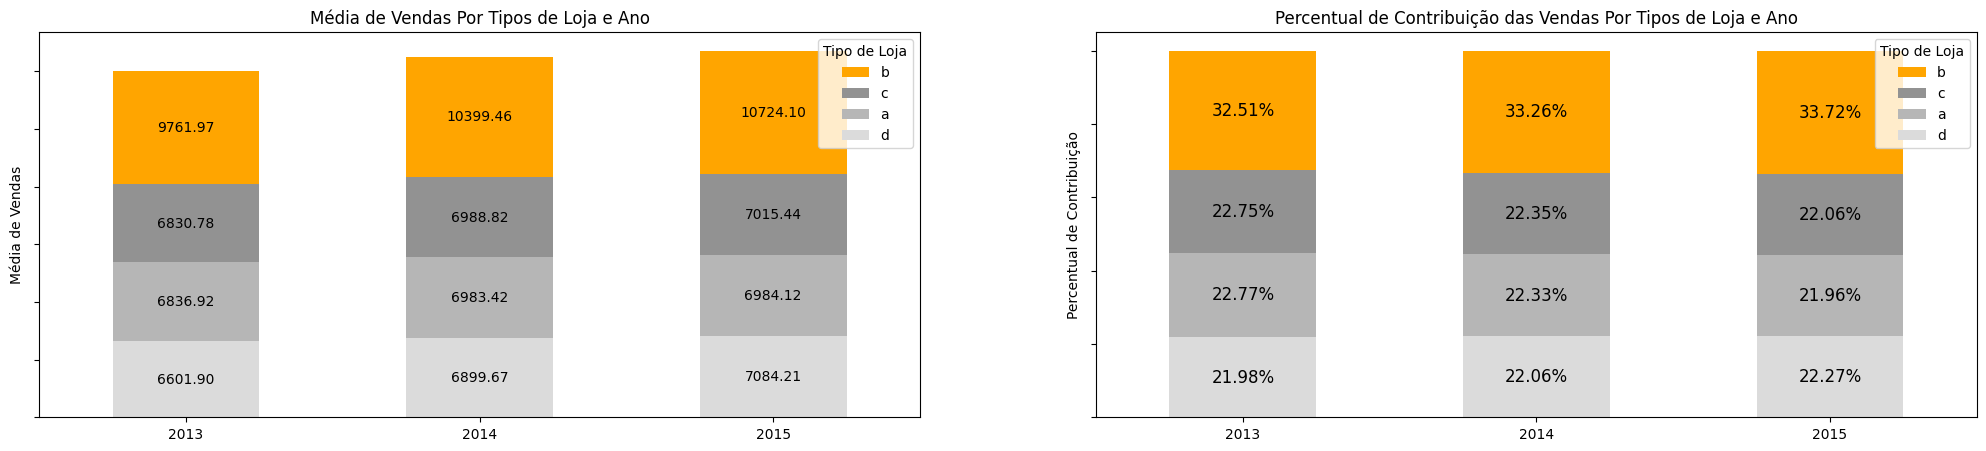

In [60]:
# Criar figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 5))

# Gráfico de barras empilhadas para médias
store_type_order = sales_train_all_df.groupby('StoreType').mean(numeric_only=True)['Sales'].sort_values(ascending=True).index

sales_by_store_type_year = (sales_train_all_df.groupby(['Year', 'StoreType'])
                            .mean(numeric_only=True)['Sales']
                            .unstack()
                            .reindex(columns=store_type_order))

# Calcular o percentual de contribuição
sales_percentage = sales_by_store_type_year.div(sales_by_store_type_year.sum(axis=1), axis=0) * 100

# Cor da loja B
highlight_color = 'orange'

# Escalas de cinza para 'A', 'C' e 'D'
gray_colors = sns.color_palette('gray', n_colors=6)

# Dicionário de mapeamento de cores
color_mapping = {'a': gray_colors[4], 'b': highlight_color, 'c': gray_colors[3], 'd': gray_colors[5]}

# Lista de cores para as barras
colors = [color_mapping[store_type] for store_type in store_type_order]

bar_plot_means = sales_by_store_type_year.plot(kind='bar', stacked=True, ax=ax1, color=colors)

# Adiciona os valores dentro de cada camada da barra para médias
for container in bar_plot_means.containers:
    ax1.bar_label(container, fmt='%0.2f', label_type='center', fontsize=10, color='black')

ax1.set_title('Média de Vendas Por Tipos de Loja e Ano')
ax1.set_xlabel('')
ax1.set_ylabel('Média de Vendas')

# Definir a ordem personalizada da legenda
custom_legend_order = ['b', 'c', 'a', 'd']  # Altere conforme necessário
handles, labels = ax1.get_legend_handles_labels()
new_handles = [handles[labels.index(store_type)] for store_type in custom_legend_order]
new_labels = [store_type for store_type in custom_legend_order]
ax1.legend(new_handles, new_labels, title='Tipo de Loja')

ax1.set_yticklabels([])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.tick_params(axis='x', rotation=0)

# Gráfico de barras empilhadas para percentuais
bar_plot_percentage = sales_percentage.plot(kind='bar', stacked=True, ax=ax2, color=colors)

# Adiciona os valores dentro de cada camada da barra para percentuais
for container in bar_plot_percentage.containers:
    ax2.bar_label(container, fmt='%0.2f%%', label_type='center', fontsize=12, color='black')

ax2.set_title('Percentual de Contribuição das Vendas Por Tipos de Loja e Ano')
ax2.set_xlabel('')
ax2.set_ylabel('Percentual de Contribuição')

# Definir a ordem personalizada da legenda
ax2.legend(new_handles, new_labels, title='Tipo de Loja')

ax2.set_yticklabels([])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.tick_params(axis='x', rotation=0)

plt.show();


Pelos gráficos acima, podemos perceber que a loja do tipo b é a que tem as melhores médias durante o período analisado.


<ipython-input-61-50e124cc8b5e>:8: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.barplot(x='Promo', y='Customers', data=sales_train_all_df, palette=colors, hue='Promo', legend=False)


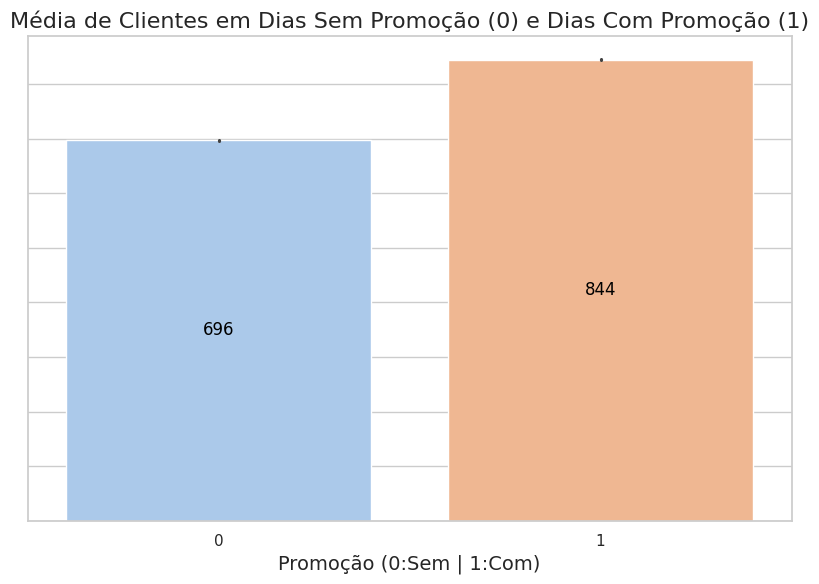

In [61]:

sns.set(style="whitegrid")


colors = sns.color_palette("pastel")


plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Promo', y='Customers', data=sales_train_all_df, palette=colors, hue='Promo', legend=False)


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height / 2, f'{int(height)}',
            ha='center', va='center', fontsize=12, color='black', weight='normal')


ax.set(yticklabels=[])
ax.set_ylabel('')  # Remove o rótulo do eixo y


plt.title('Média de Clientes em Dias Sem Promoção (0) e Dias Com Promoção (1)', fontsize=16)
plt.xlabel('Promoção (0:Sem | 1:Com)', fontsize=14)


plt.tight_layout();


plt.show();


Evidentemente, como demonstrado no gráfico acima, há uma média maior de número de clientes nas lojas em dias de promoção comparando com dias sem promoção.

## Treinamento do modelo - parte 1

FACEBOOK PROPHET (PROFETA)

• É um software open source lançado pelo time de Ciência de Dados do
Facebook

• Permite a previsão de séries temporais baseado em “regressão
aditiva”

• Tendências não lineares podem ser descobertas anualmente,
semanalmente, diariamente (considera feriados)

• Funciona melhor com efeitos sazonais e com grande quantidade de
dados

• Para mais informações

o https://research.fb.com/prophet-forecasting-at-scale/

o https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [62]:
!pip install prophet

In [63]:
from prophet import Prophet

Nesse primeiro modelo, não levaremos em conta os feriados.

In [64]:
# Date: ds
# Sales: y
# Função para a predição de vendas que recebe como parâmetros: id da loja,
# dataframe com os dados de vendas e a quantidade de dias de previsão (periods)

def sales_prediction(store_id, sales_df, periods):
  sales_df = sales_df[sales_df['Store'] == store_id]
  # Para o prophet as colunas abaixo devem ser renomeadas:
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values(by = 'ds')

  model = Prophet()
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
  figure2 = model.plot_components(forecast)

  return sales_df, forecast

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/uo45hfx6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/6_wcnaxm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3866', 'data', 'file=/tmp/tmpsg3cb_m1/uo45hfx6.json', 'init=/tmp/tmpsg3cb_m1/6_wcnaxm.json', 'output', 'file=/tmp/tmpsg3cb_m1/prophet_modelheeh330x/prophet_model-20240213215325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:53:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


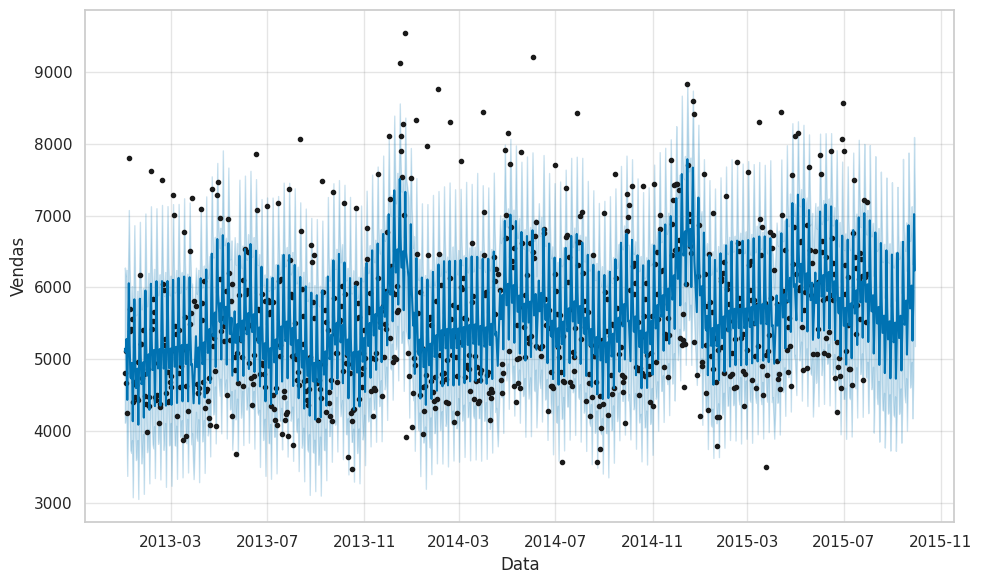

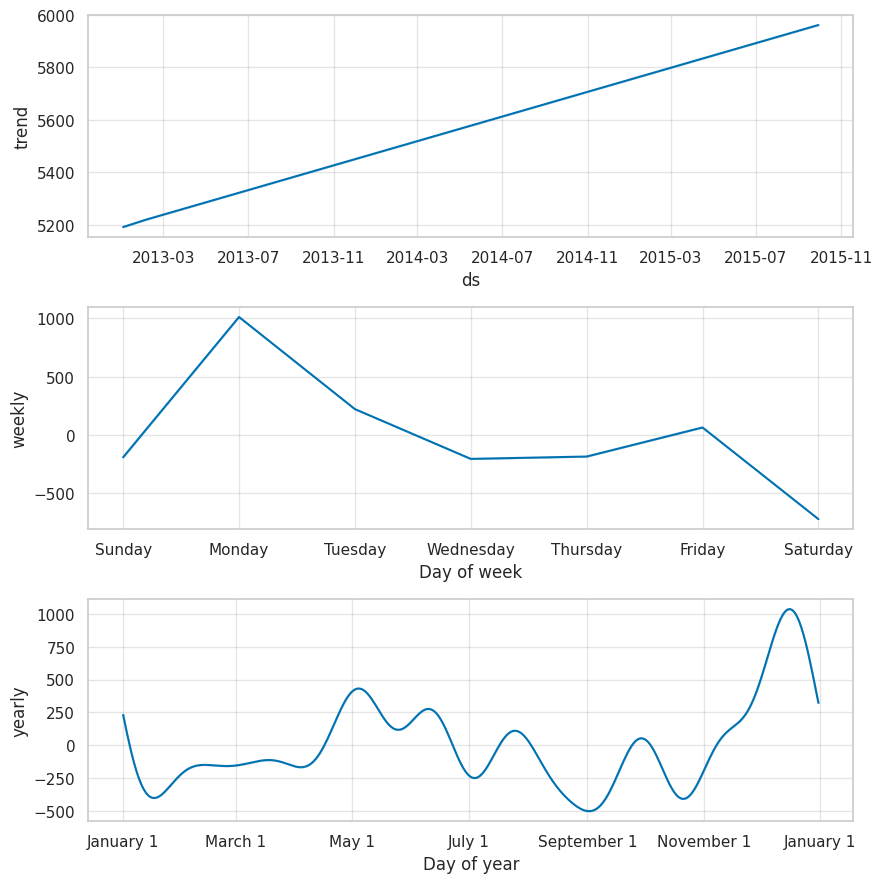

In [65]:
df_origin, df_prediction = sales_prediction(10,sales_train_all_df,60)

No primeiro gráfico acima, podemos ver as previsões logo após os pontos pretos, que são os dados reais.

No segundo gráfico podemos ver a tendência das vendas, que é de alta, ou seja desde 2013 elas vem subindo.

Em seguida temos as vendas por dias da semana.

E no derradeiro por mês do ano.

In [66]:
# Comparando shape do df original com o df de previsões
# Como usamos 30 períodos na função, o df de previsão tem 60 linhas a mais

df_origin.shape, df_prediction.shape

((784, 2), (844, 19))

In [67]:
# No dataframe de previsão resultante da função
# temos vários atributos resultantes da aplicação do algoritmo
# sendo o yhat o de previsão de vendas

df_prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5190.61,4118.90,6276.68,5190.61,5190.61,-43.91,-43.91,-43.91,-204.32,-204.32,-204.32,160.40,160.40,160.40,0.00,0.00,0.00,5146.70
1,2013-01-03,5191.48,4131.61,6158.70,5191.48,5191.48,-92.67,-92.67,-92.67,-184.20,-184.20,-184.20,91.53,91.53,91.53,0.00,0.00,0.00,5098.81
2,2013-01-04,5192.35,4206.69,6242.77,5192.35,5192.35,90.44,90.44,90.44,64.87,64.87,64.87,25.57,25.57,25.57,0.00,0.00,0.00,5282.79
3,2013-01-05,5193.22,3378.87,5473.34,5193.22,5193.22,-757.17,-757.17,-757.17,-720.33,-720.33,-720.33,-36.84,-36.84,-36.84,0.00,0.00,0.00,4436.04
4,2013-01-07,5194.95,5033.65,7076.11,5194.95,5194.95,862.91,862.91,862.91,1011.85,1011.85,1011.85,-148.94,-148.94,-148.94,0.00,0.00,0.00,6057.86


In [68]:
# Analisando o atributo yhat das últimas 60 linhas do dataframe
# justamente o período de previsão passado como parâmetro na função

df_prediction.tail(60)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
784,2015-08-01,5916.53,4251.86,6290.71,5916.53,5916.53,-675.50,-675.50,-675.50,-720.33,-720.33,-720.33,44.82,44.82,44.82,0.00,0.00,0.00,5241.02
785,2015-08-02,5917.29,4705.20,6750.33,5917.29,5917.29,-165.65,-165.65,-165.65,-190.33,-190.33,-190.33,24.68,24.68,24.68,0.00,0.00,0.00,5751.65
786,2015-08-03,5918.06,5842.42,7978.63,5918.06,5918.06,1014.63,1014.63,1014.63,1011.85,1011.85,1011.85,2.78,2.78,2.78,0.00,0.00,0.00,6932.69
787,2015-08-04,5918.83,5053.34,7157.06,5918.83,5918.83,201.93,201.93,201.93,222.45,222.45,222.45,-20.52,-20.52,-20.52,0.00,0.00,0.00,6120.76
788,2015-08-05,5919.60,4584.50,6709.04,5919.60,5919.60,-249.19,-249.19,-249.19,-204.32,-204.32,-204.32,-44.87,-44.87,-44.87,0.00,0.00,0.00,5670.41
789,2015-08-06,5920.37,4618.13,6791.22,5920.37,5920.37,-254.13,-254.13,-254.13,-184.20,-184.20,-184.20,-69.93,-69.93,-69.93,0.00,0.00,0.00,5666.24
790,2015-08-07,5921.14,4896.55,6897.55,5921.14,5921.14,-30.50,-30.50,-30.50,64.87,64.87,64.87,-95.37,-95.37,-95.37,0.00,0.00,0.00,5890.64
791,2015-08-08,5921.91,3981.02,6159.05,5921.91,5921.91,-841.22,-841.22,-841.22,-720.33,-720.33,-720.33,-120.90,-120.90,-120.90,0.00,0.00,0.00,5080.68
792,2015-08-09,5922.67,4503.66,6663.72,5922.67,5922.67,-336.58,-336.58,-336.58,-190.33,-190.33,-190.33,-146.24,-146.24,-146.24,0.00,0.00,0.00,5586.10
793,2015-08-10,5923.44,5718.60,7824.29,5923.44,5923.44,840.66,840.66,840.66,1011.85,1011.85,1011.85,-171.19,-171.19,-171.19,0.00,0.00,0.00,6764.10


### Avaliação do Modelo 1

In [69]:
# Importando as bibliotecas necessárias

from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import performance_metrics

O método cross_validation do Prophet é utilizado para realizar a validação cruzada do modelo. A validação cruzada é uma técnica estatística que é frequentemente usada para avaliar o desempenho de um modelo em um conjunto de dados. No contexto de séries temporais, como previsões de vendas, a validação cruzada é especialmente importante para garantir que o modelo seja robusto e generalize bem para dados futuros.

A função cross_validation do Prophet divide os dados históricos em intervalos de treinamento e teste e ajusta o modelo repetidamente, avaliando seu desempenho em diferentes pontos no tempo. Aqui estão os principais parâmetros da função:

model: O modelo Prophet que você deseja avaliar.

initial: A quantidade de dados iniciais a serem usados para treinamento.

period: O espaçamento entre pontos no conjunto de dados para os quais o modelo é ajustado.

horizon: O período de tempo para o qual as previsões são feitas no conjunto de teste.

A saída da função cross_validation é um DataFrame que contém colunas como 'ds', 'yhat', 'yhat_lower', 'yhat_upper', 'y', entre outras. Aqui está uma breve explicação dessas colunas principais:

ds: A data para a qual a previsão foi feita.

y: O valor real no conjunto de teste.

yhat: A previsão do modelo para a data correspondente em 'ds'.

yhat_lower e yhat_upper: Intervalo de confiança para a previsão.

Além disso, você pode usar a função plot_cross_validation_metric para visualizar as métricas de desempenho ao longo do tempo. A métrica padrão é o 'mape' (Mean Absolute Percentage Error), mas você pode escolher outras métricas, como 'mae' (Mean Absolute Error) ou 'mse' (Mean Squared Error), dependendo das suas necessidades.

É importante realizar a validação cruzada para garantir que o modelo não esteja apenas memorizando os dados de treinamento, mas também é capaz de generalizar bem para novos dados. Essa técnica ajuda a identificar se há sobreajuste (overfitting) ou subajuste (underfitting) no modelo.







In [70]:
# Função para ajustar o modelo Prophet aos dados de uma loja específica

def fit_prophet_model(store_id, sales_df):
    # Filtrando os dados da loja específica
    sales_df = sales_df[sales_df['Store'] == store_id]

    # Renomeando as colunas conforme necessário para o Prophet
    sales_df = sales_df[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})
    sales_df = sales_df.sort_values(by='ds')

    # Inicializando e ajustando o modelo Prophet
    model = Prophet()
    model.fit(sales_df)

    return model

In [71]:
# Função para realizar a validação cruzada e plotar métricas de desempenho

def perform_cross_validation(model, initial='730 days', period='180 days', horizon='60 days'):
    # Realizando a validação cruzada
    df_cv = cross_validation(model, initial=initial, period=period, horizon=horizon)

    # Extraindo métricas de desempenho
    metrics_df = performance_metrics(df_cv)

    # Plotando as métricas de desempenho
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # Subplots para cada métrica

    # Métrica 'mape'
    plot_cross_validation_metric(df_cv, metric='mape', ax=ax[0])
    ax[0].set_title('Mean Absolute Percentage Error (MAPE)')

    # Métrica 'mae'
    plot_cross_validation_metric(df_cv, metric='mae', ax=ax[1])
    ax[1].set_title('Mean Absolute Error (MAE)')

    # Métrica 'mse'
    plot_cross_validation_metric(df_cv, metric='mse', ax=ax[2])
    ax[2].set_title('Mean Squared Error (MSE)')

    plt.tight_layout()
    plt.show()

    # Exibindo DataFrame de métricas de desempenho
    display(metrics_df)

    return df_cv, metrics_df


In [72]:
# Treinando o modelo
prophet_model1 = fit_prophet_model(10, sales_train_all_df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/1_0wjs90.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/m7ks_crf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21546', 'data', 'file=/tmp/tmpsg3cb_m1/1_0wjs90.json', 'init=/tmp/tmpsg3cb_m1/m7ks_crf.json', 'output', 'file=/tmp/tmpsg3cb_m1/prophet_modelf5ruy6vf/prophet_model-20240213215328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:53:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Making 1 forecasts with cutoffs between 2015-06-01 00:00:00 and 2015-06-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/vt7jg2om.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/589ljg2o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51683', 'data', 'file=/tmp/tmpsg3cb_m1/vt7jg2om.json', 'init=/tmp/tmpsg3cb_m1/589ljg2o.json', 'output', 'file=/tmp/tmpsg3cb_m1/prophet_modelseyrja_a/prophet_model-20240213215329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:53:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


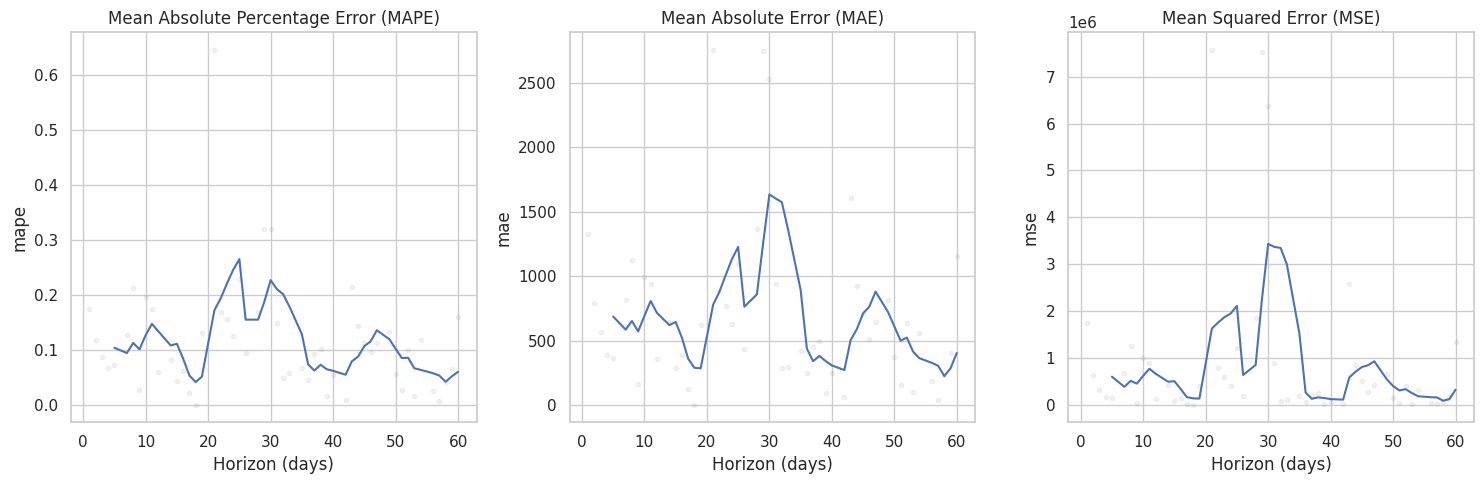

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,5 days,595156.55,771.46,686.14,0.10,0.09,0.11,0.80
1,7 days,378385.00,615.13,584.79,0.09,0.09,0.09,1.00
2,8 days,505551.84,711.02,651.34,0.11,0.09,0.11,0.80
3,9 days,446964.28,668.55,570.78,0.10,0.07,0.09,0.80
4,10 days,613577.26,783.31,691.55,0.13,0.13,0.12,0.80
5,11 days,764075.00,874.11,806.63,0.15,0.17,0.14,0.80
6,12 days,656451.61,810.22,714.89,0.13,0.17,0.12,0.80
7,14 days,487910.92,698.51,619.47,0.11,0.08,0.10,1.00
8,15 days,498811.41,706.27,643.89,0.11,0.08,0.11,1.00
9,16 days,331808.92,576.03,522.62,0.08,0.06,0.08,1.00


In [73]:
# Realizando a validação cruzada
df_cv_model1, metrics_df = perform_cross_validation(prophet_model1)

**Métricas de Avaliação do Modelo**

Ao avaliar o desempenho do modelo Prophet durante a validação cruzada, é comum utilizar diversas métricas que oferecem insights sobre diferentes aspectos da precisão das previsões. Aqui estão algumas métricas frequentemente utilizadas:

**1. MAPE (Mean Absolute Percentage Error):**

O MAPE é uma métrica que calcula a média dos erros percentuais absolutos entre as previsões do modelo e os valores reais. É expresso em termos percentuais, fornecendo uma medida relativa de precisão.

Fórmula: MAPE = (1/n) * Σ(|(y - yhat)| / |y|) * 100, onde n é o número de observações.

**2. MAE (Mean Absolute Error):**

O MAE é uma métrica que calcula a média dos erros absolutos entre as previsões do modelo e os valores reais. Representa a magnitude média dos erros sem considerar a direção.

Fórmula: MAE = (1/n) * Σ|y - yhat|, onde n é o número de observações.


**3. MSE (Mean Squared Error):**

O MSE é uma métrica que calcula a média dos quadrados dos erros entre as previsões do modelo e os valores reais. Dá mais peso aos erros maiores.

Fórmula: MSE = (1/n) * Σ(y - yhat)^2, onde n é o número de observações.


*Cada métrica fornece uma perspectiva única sobre o desempenho do modelo. O MAPE é útil para entender a precisão percentual, o MAE destaca a magnitude média dos erros, e o MSE considera o impacto dos erros grandes. Ao interpretar essas métricas em conjunto, é possível obter uma visão abrangente da qualidade das previsões do modelo.



##Treinamento do modelo - parte 2


Neste modelo serão inclusos os feriados escolares e nacionais

   - StateHoliday: Normalmente todas as lojas estão fechadas nesses feriados. As escolas estão fechadas nesses feriados e nos finais de semana.
   
   Legenda: a = public holiday, b = Páscoa, c = Natal, 0 = Nenhum feriado

   - SchoolHoliday: indica se a loja foi afetada pelo feriado escolar
  






In [74]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0,2015,7,27


In [75]:
# Separando datas de feriados escolares

school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays.shape

(163457,)

In [76]:
school_holidays

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-04',
       '2013-01-03', '2013-01-02'], dtype=object)

In [77]:
len(np.unique(school_holidays))

477

In [78]:
# Separando datas de feriados nacionais

state_holidays = sales_train_all_df[(sales_train_all_df['StateHoliday'] == 'a') |
                                    (sales_train_all_df['StateHoliday'] == 'b') |
                                    (sales_train_all_df['StateHoliday'] == 'c')].loc[:,'Date'].values

In [79]:
state_holidays.shape

(910,)

In [80]:
len(np.unique(state_holidays))

35

In [81]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})
state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
905,2013-04-01,state_holiday
906,2013-08-15,state_holiday
907,2015-06-04,state_holiday
908,2014-06-19,state_holiday


In [82]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                               'holiday': 'school_holiday'})
school_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


In [83]:
school_state_holidays = pd.concat((state_holidays, school_holidays))
school_state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


In [84]:
import itertools

In [85]:
# Para este segundo modelo considerei incluir um bloco/função
# de ajuste de hiperparâmetros, a fim de encontrar a melhor sintonia

def tune_hyperparameters_holidays(store_id, sales_df, param_grid, holidays=None):
    sales_df = sales_df[sales_df['Store'] == store_id]
    sales_df = sales_df[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})
    sales_df = sales_df.sort_values(by='ds')

    # Gerar todas as combinações de parâmetros
    all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
    rmses = []  # Armazenar os RMSEs para cada conjunto de parâmetros

    # Usar validação cruzada para avaliar todos os parâmetros
    for params in all_params:
        # Adicionar feriados ao dicionário de parâmetros
        params_with_holidays = params.copy()
        params_with_holidays['holidays'] = holidays

        m = Prophet(**params_with_holidays).fit(sales_df)
        df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='60 days')
        df_p = performance_metrics(df_cv)
        rmses.append(df_p['rmse'].mean())

    # Encontrar os melhores parâmetros
    tuning_results = pd.DataFrame(all_params)
    tuning_results['rmse'] = rmses
    best_params = tuning_results.loc[tuning_results['rmse'].idxmin()]

    # Converter para dicionário
    best_params_dict = best_params.to_dict()

    return best_params_dict

**Explicação do Código:**

A função recebe um grid de hiperparâmetros param_grid que inclui valores diferentes para changepoint_prior_scale e seasonality_prior_scale.

itertools.product é usado para gerar todas as combinações possíveis de valores de hiperparâmetros.

Um loop é usado para ajustar o modelo Prophet com cada conjunto de parâmetros e realizar a validação cruzada para avaliar o desempenho do modelo.

Os resultados, incluindo os valores de RMSE para cada conjunto de parâmetros, são armazenados em um DataFrame.

Os melhores parâmetros são identificados com base no menor valor de RMSE.

Essa abordagem é útil para explorar diversas combinações de hiperparâmetros e identificar aquelas que resultam em melhores métricas de desempenho.




In [86]:
# Exemplo de uso para sintonizar hiperparâmetros
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

best_hyperparams = tune_hyperparameters_holidays(store_id=10, sales_df=sales_train_all_df, param_grid=param_grid, holidays=school_state_holidays)
print("Melhores Hiperparâmetros:")
print(best_hyperparams)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/_yig53rw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/rpaj_p90.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89796', 'data', 'file=/tmp/tmpsg3cb_m1/_yig53rw.json', 'init=/tmp/tmpsg3cb_m1/rpaj_p90.json', 'output', 'file=/tmp/tmpsg3cb_m1/prophet_modelg4gsfz7w/prophet_model-20240213215412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:54:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 1 forecasts with cutoffs between 2015-06-01 00:00:00 and 2015-06-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/yopjzyww.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/6p_a49r7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32814', 'data', 'file=/tmp/tmpsg3cb_m1/yopjzyww.json', 'init=/tmp/tmpsg3cb_m1/6p_a49r7.json', 'output', 'file=/tmp/tmpsg3cb_m1/prophet_modeldx45bn7k/prophet_model-20240213215432.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:54:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/94dleqte.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/0lyxn788.json
DEBUG:cmdstanpy:

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/60mvn42n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/q2hlzuob.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78350', 'data', 'file=/tmp/tmpsg3cb_m1/60mvn42n.json', 'init=/tmp/tmpsg3cb_m1/q2hlzuob.json', 'output', 'file=/tmp/tmpsg3cb_m1/prophet_model9o0688up/prophet_model-20240213215559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:55:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/2scuhu76.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/en_v2sc7.json
DEBUG:cmdstanpy:

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/optf60dh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/apz_n9ha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96982', 'data', 'file=/tmp/tmpsg3cb_m1/optf60dh.json', 'init=/tmp/tmpsg3cb_m1/apz_n9ha.json', 'output', 'file=/tmp/tmpsg3cb_m1/prophet_model8ub2h81p/prophet_model-20240213215721.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:57:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:57:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/ca3a5gd8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/gpa2r9p8.json
DEBUG:cmdstanpy:

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/zizln_gv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/rditwqc0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23592', 'data', 'file=/tmp/tmpsg3cb_m1/zizln_gv.json', 'init=/tmp/tmpsg3cb_m1/rditwqc0.json', 'output', 'file=/tmp/tmpsg3cb_m1/prophet_modelv809f_0e/prophet_model-20240213215844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:58:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:58:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/3j9prknc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/f1644ay0.json
DEBUG:cmdstanpy:

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/oei0ngek.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/ad5j7ut7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19084', 'data', 'file=/tmp/tmpsg3cb_m1/oei0ngek.json', 'init=/tmp/tmpsg3cb_m1/ad5j7ut7.json', 'output', 'file=/tmp/tmpsg3cb_m1/prophet_modelby81lspb/prophet_model-20240213220007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:00:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:00:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/9bcowkwl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/4_gaggpx.json
DEBUG:cmdstanpy:

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/io5rtxf3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/srqd1c6y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42620', 'data', 'file=/tmp/tmpsg3cb_m1/io5rtxf3.json', 'init=/tmp/tmpsg3cb_m1/srqd1c6y.json', 'output', 'file=/tmp/tmpsg3cb_m1/prophet_modelwxggsht6/prophet_model-20240213220131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:01:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:01:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/nv2lsc6w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/7urix1y1.json
DEBUG:cmdstanpy:

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/dgn3z12y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/st8y_4d_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46848', 'data', 'file=/tmp/tmpsg3cb_m1/dgn3z12y.json', 'init=/tmp/tmpsg3cb_m1/st8y_4d_.json', 'output', 'file=/tmp/tmpsg3cb_m1/prophet_modelg38ue0_h/prophet_model-20240213220255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:02:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:02:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/63x4kzfg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/7nlz7ed2.json
DEBUG:cmdstanpy:

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/vtfmv9g6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/m6wp8ykw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21577', 'data', 'file=/tmp/tmpsg3cb_m1/vtfmv9g6.json', 'init=/tmp/tmpsg3cb_m1/m6wp8ykw.json', 'output', 'file=/tmp/tmpsg3cb_m1/prophet_modelxldb_2n7/prophet_model-20240213220419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:04:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/zgsw85ed.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/r_un57qj.json
DEBUG:cmdstanpy:

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/vorovmly.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/dzey_i38.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76373', 'data', 'file=/tmp/tmpsg3cb_m1/vorovmly.json', 'init=/tmp/tmpsg3cb_m1/dzey_i38.json', 'output', 'file=/tmp/tmpsg3cb_m1/prophet_modelo08rb76z/prophet_model-20240213220542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:05:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/x390a_ap.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/yeq4g7b4.json
DEBUG:cmdstanpy:

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/jzsqnq_n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/cieuxlj8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93373', 'data', 'file=/tmp/tmpsg3cb_m1/jzsqnq_n.json', 'init=/tmp/tmpsg3cb_m1/cieuxlj8.json', 'output', 'file=/tmp/tmpsg3cb_m1/prophet_modelk2yu20l7/prophet_model-20240213220706.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:07:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:07:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/sap758xg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/ym43cntp.json
DEBUG:cmdstanpy:

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/xwyu4awf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/sfmzcis4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29214', 'data', 'file=/tmp/tmpsg3cb_m1/xwyu4awf.json', 'init=/tmp/tmpsg3cb_m1/sfmzcis4.json', 'output', 'file=/tmp/tmpsg3cb_m1/prophet_model2z06sk06/prophet_model-20240213220829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:08:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:08:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/jhbctxsr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/_9msdvpd.json
DEBUG:cmdstanpy:

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/49872mb3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/kl_g8732.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85641', 'data', 'file=/tmp/tmpsg3cb_m1/49872mb3.json', 'init=/tmp/tmpsg3cb_m1/kl_g8732.json', 'output', 'file=/tmp/tmpsg3cb_m1/prophet_model2c4qfh_l/prophet_model-20240213220952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:09:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:09:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/9gqm49da.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/pqlgz16z.json
DEBUG:cmdstanpy:

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/drl2kfw4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/89vs0vks.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36391', 'data', 'file=/tmp/tmpsg3cb_m1/drl2kfw4.json', 'init=/tmp/tmpsg3cb_m1/89vs0vks.json', 'output', 'file=/tmp/tmpsg3cb_m1/prophet_modelcy93po1x/prophet_model-20240213221115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:11:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:11:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/nkugu2h0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/ux_miak0.json
DEBUG:cmdstanpy:

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/52zif5ks.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/_gi67nhd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78762', 'data', 'file=/tmp/tmpsg3cb_m1/52zif5ks.json', 'init=/tmp/tmpsg3cb_m1/_gi67nhd.json', 'output', 'file=/tmp/tmpsg3cb_m1/prophet_model3t1rt6pe/prophet_model-20240213221240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:12:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:12:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/xnzukzo4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/fh9bto6p.json
DEBUG:cmdstanpy:

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/gc6x8mia.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/gxf3zas5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30655', 'data', 'file=/tmp/tmpsg3cb_m1/gc6x8mia.json', 'init=/tmp/tmpsg3cb_m1/gxf3zas5.json', 'output', 'file=/tmp/tmpsg3cb_m1/prophet_model_7e7sdk_/prophet_model-20240213221404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:14:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:14:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/0j7rhvhe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/vji8wivh.json
DEBUG:cmdstanpy:

  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/1sqhv_1l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/8kyjhllf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30997', 'data', 'file=/tmp/tmpsg3cb_m1/1sqhv_1l.json', 'init=/tmp/tmpsg3cb_m1/8kyjhllf.json', 'output', 'file=/tmp/tmpsg3cb_m1/prophet_modelr3rbcenn/prophet_model-20240213221527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:15:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:15:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Melhores Hiperparâmetros:
{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1, 'rmse': 776.647943250306}


In [87]:
best_hyperparams

{'changepoint_prior_scale': 0.001,
 'seasonality_prior_scale': 0.1,
 'rmse': 776.647943250306}

In [88]:
# Função aprimorada para receber feriados e hyperamaters previamente sintonizados


def sales_prediction_holidays(store_id, sales_df, periods, holidays, hyperparameters=None):
    sales_df = sales_df[sales_df['Store'] == store_id]
    sales_df = sales_df[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})
    sales_df = sales_df.sort_values(by='ds')

    # Adicionando verificação para hiperparâmetros
    if hyperparameters is None:
        hyperparameters = {
            'changepoint_prior_scale': 0.05,
            'seasonality_prior_scale': 10.0,
            # Adicione outros hiperparâmetros padrão conforme necessário
        }

    # Filtrar apenas chaves válidas para Prophet
    valid_hyperparameters = {key: value for key, value in hyperparameters.items() if key in Prophet().__init__.__code__.co_varnames}

    # Verificar se as chaves necessárias existem no dicionário
    for key in ['changepoint_prior_scale', 'seasonality_prior_scale']:
        if key not in valid_hyperparameters:
            raise ValueError(f'O hiperparâmetro obrigatório "{key}" está ausente.')

    # Criando o modelo Prophet com hiperparâmetros
    model = Prophet(**valid_hyperparameters, holidays=holidays)
    model.fit(sales_df)

    # Realizando a previsão
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)

    # Plotando gráficos e componentes (opcional)
    figure1 = model.plot(forecast, xlabel='Data', ylabel='Vendas')
    figure2 = model.plot_components(forecast)

    return sales_df, forecast


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/udz3580r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/yrd4rf59.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62061', 'data', 'file=/tmp/tmpsg3cb_m1/udz3580r.json', 'init=/tmp/tmpsg3cb_m1/yrd4rf59.json', 'output', 'file=/tmp/tmpsg3cb_m1/prophet_modelrcalmtyf/prophet_model-20240213221632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:16:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:16:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


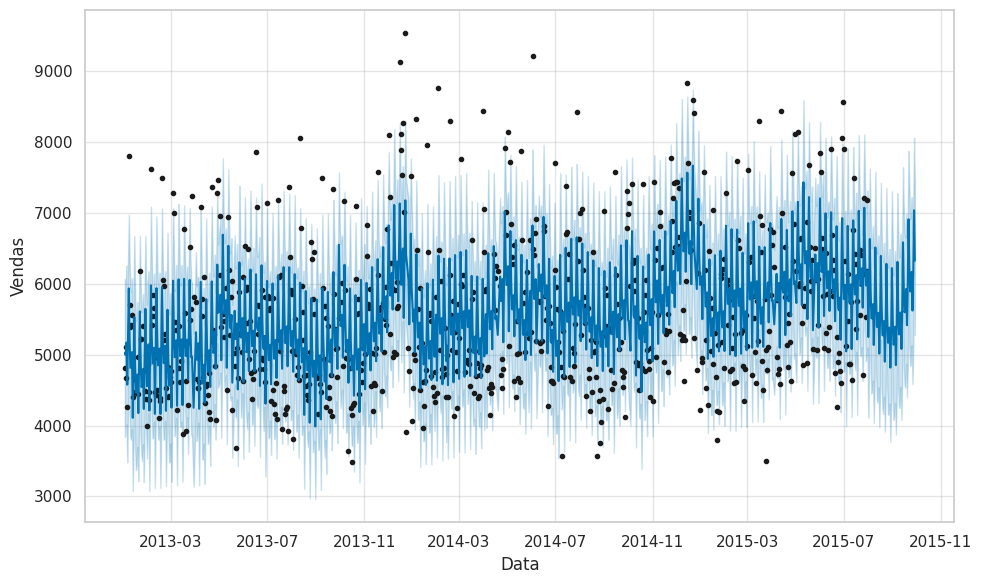

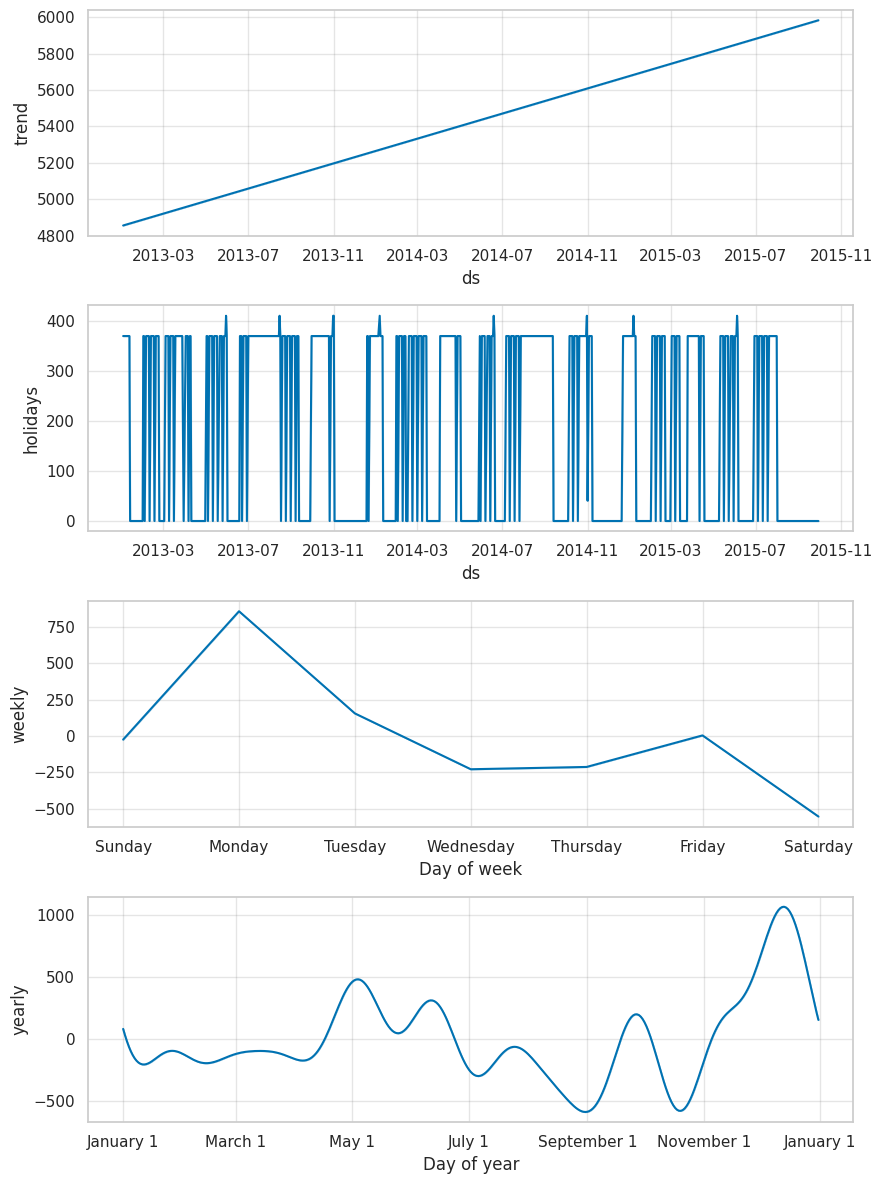

In [89]:
# Utilizando a função para gerar previsões de vendas para 60 dias

df_original, df_prediction = sales_prediction_holidays(store_id=10, sales_df=sales_train_all_df, holidays=school_state_holidays, periods=60, hyperparameters=best_hyperparams)

In [90]:
df_prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
839,2015-09-25,5978.75,5130.84,7223.48,5978.75,5978.75,187.99,187.99,187.99,0.00,...,4.44,4.44,4.44,183.56,183.56,183.56,0.00,0.00,0.00,6166.74
840,2015-09-26,5979.88,4582.21,6677.91,5979.88,5979.88,-358.27,-358.27,-358.27,0.00,...,-553.20,-553.20,-553.20,194.94,194.94,194.94,0.00,0.00,0.00,5621.61
841,2015-09-27,5981.01,5102.60,7154.93,5981.01,5981.01,175.13,175.13,175.13,0.00,...,-24.34,-24.34,-24.34,199.47,199.47,199.47,0.00,0.00,0.00,6156.14
842,2015-09-28,5982.14,5950.77,8061.39,5982.14,5982.14,1055.15,1055.15,1055.15,0.00,...,858.19,858.19,858.19,196.97,196.97,196.97,0.00,0.00,0.00,7037.29
843,2015-09-29,5983.26,5279.40,7412.18,5983.26,5983.26,343.10,343.10,343.10,0.00,...,155.69,155.69,155.69,187.41,187.41,187.41,0.00,0.00,0.00,6326.36


### Avaliação do modelo 2

In [91]:
# Função para ajustar o modelo Prophet aos dados de uma loja específica

def fit_prophet_model(store_id, sales_df, hyperparameters=None, holidays=None):
    # Filtrando os dados da loja específica
    sales_df = sales_df[sales_df['Store'] == store_id]

    # Renomeando as colunas conforme necessário para o Prophet
    sales_df = sales_df[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})
    sales_df = sales_df.sort_values(by='ds')

    # Adicionando verificação para hiperparâmetros
    if hyperparameters is None:
        hyperparameters = {
            'changepoint_prior_scale': 0.05,
            'seasonality_prior_scale': 10.0,
            # Adicione outros hiperparâmetros padrão conforme necessário
        }

    # Filtrar apenas chaves válidas para Prophet
    valid_hyperparameters = {key: value for key, value in hyperparameters.items() if key in Prophet().__init__.__code__.co_varnames}

    # Verificar se as chaves necessárias existem no dicionário
    for key in ['changepoint_prior_scale', 'seasonality_prior_scale']:
        if key not in valid_hyperparameters:
            raise ValueError(f'O hiperparâmetro obrigatório "{key}" está ausente.')

    # Criando o modelo Prophet com hiperparâmetros
    model = Prophet(**valid_hyperparameters, holidays=holidays)
    model.fit(sales_df)

    return model


In [92]:
# Função para realizar a validação cruzada e plotar métricas de desempenho

def perform_cross_validation2(model, hyperparameters=None, holidays=None, initial='730 days', period='180 days', horizon='60 days'):
    # Adicionando feriados ao dicionário de hiperparâmetros
    if hyperparameters is None:
        hyperparameters = {}
    if holidays is not None:
        hyperparameters['holidays'] = holidays

    # Realizando a validação cruzada
    df_cv = cross_validation(model, initial=initial, period=period, horizon=horizon)

    # Extraindo métricas de desempenho
    metrics_df = performance_metrics(df_cv)

    # Plotando as métricas de desempenho
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # Subplots para cada métrica

    # Métrica 'mape'
    plot_cross_validation_metric(df_cv, metric='mape', ax=ax[0])
    ax[0].set_title('Mean Absolute Percentage Error (MAPE)')

    # Métrica 'mae'
    plot_cross_validation_metric(df_cv, metric='mae', ax=ax[1])
    ax[1].set_title('Mean Absolute Error (MAE)')

    # Métrica 'mse'
    plot_cross_validation_metric(df_cv, metric='mse', ax=ax[2])
    ax[2].set_title('Mean Squared Error (MSE)')

    plt.tight_layout()
    plt.show()

    # Exibindo DataFrame de métricas de desempenho
    display(metrics_df)

    return df_cv, metrics_df

In [93]:
# Ajustando o modelo
prophet_model2 = fit_prophet_model(store_id=10, sales_df=sales_train_all_df, hyperparameters=best_hyperparams, holidays=school_state_holidays)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/oggk2ytj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/1n47zt6k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58332', 'data', 'file=/tmp/tmpsg3cb_m1/oggk2ytj.json', 'init=/tmp/tmpsg3cb_m1/1n47zt6k.json', 'output', 'file=/tmp/tmpsg3cb_m1/prophet_model8widez9f/prophet_model-20240213221818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:18:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:18:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Making 1 forecasts with cutoffs between 2015-06-01 00:00:00 and 2015-06-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/u4cfg_46.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsg3cb_m1/gp9jf51n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50233', 'data', 'file=/tmp/tmpsg3cb_m1/u4cfg_46.json', 'init=/tmp/tmpsg3cb_m1/gp9jf51n.json', 'output', 'file=/tmp/tmpsg3cb_m1/prophet_modeld2sf89ut/prophet_model-20240213221839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:18:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:18:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


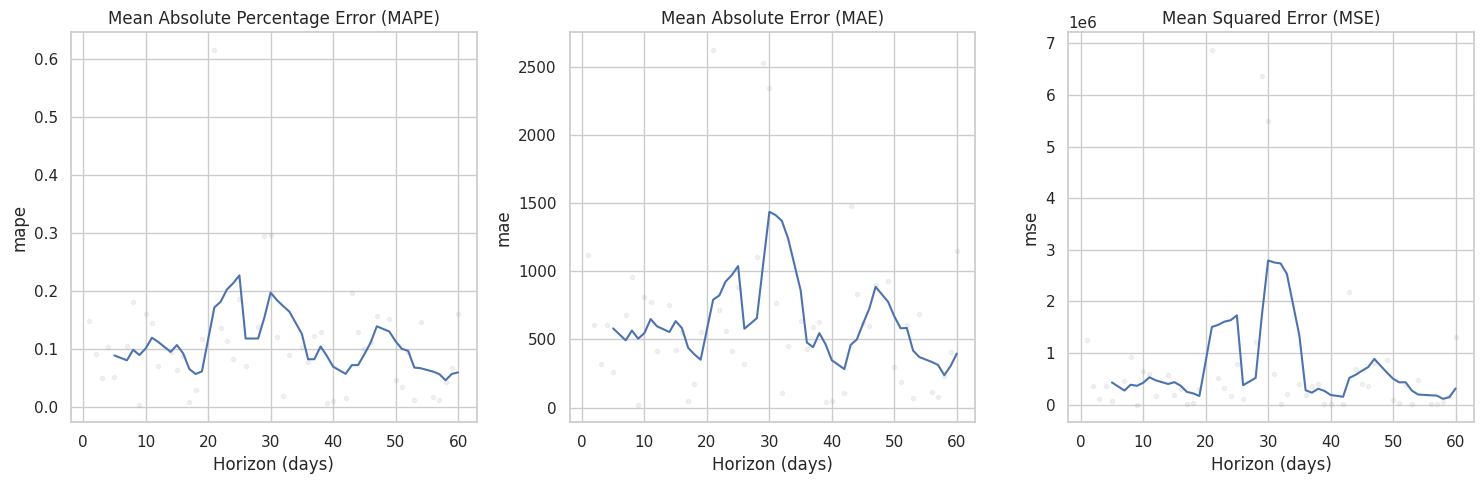

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,5 days,428603.24,654.68,580.81,0.09,0.09,0.09,1.00
1,7 days,271800.13,521.34,493.41,0.08,0.09,0.08,1.00
2,8 days,383864.62,619.57,565.10,0.10,0.10,0.09,1.00
3,9 days,363290.25,602.74,505.37,0.09,0.10,0.08,1.00
4,10 days,421759.52,649.43,546.74,0.10,0.11,0.09,1.00
5,11 days,528035.59,726.66,649.37,0.12,0.14,0.11,1.00
6,12 days,470286.43,685.77,596.54,0.11,0.14,0.11,1.00
7,14 days,398253.64,631.07,554.44,0.09,0.09,0.09,1.00
8,15 days,433815.05,658.65,634.32,0.11,0.09,0.10,1.00
9,16 days,364473.27,603.72,583.58,0.09,0.09,0.09,1.00


In [94]:
# Realizando a validação cruzada
df_cv_model2, metrics_df = perform_cross_validation2(model=prophet_model2, hyperparameters=best_hyperparams, holidays=school_state_holidays)

Métricas do Modelo 1:
horizon     32 days 20:00:00
mse                852130.31
rmse                  809.52
mae                   678.54
mape                    0.11
mdape                   0.10
smape                   0.11
coverage                0.85
dtype: object

Métricas do Modelo 2:
horizon     32 days 20:00:00
mse                741983.06
rmse                  776.65
mae                   641.12
mape                    0.11
mdape                   0.09
smape                   0.11
coverage                0.92
dtype: object


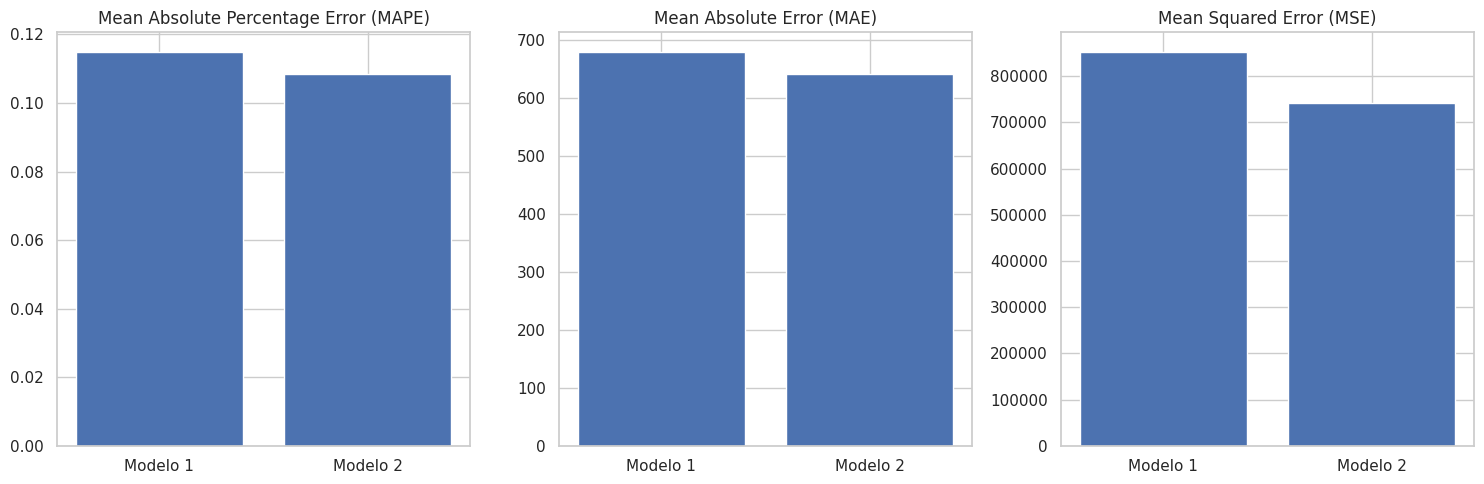

In [97]:
# Comparação de Métricas entre os Modelos
metrics_model1 = performance_metrics(df_cv_model1).mean()
metrics_model2 = performance_metrics(df_cv_model2).mean()

# Exibindo Métricas
print("Métricas do Modelo 1:")
print(metrics_model1)

print("\nMétricas do Modelo 2:")
print(metrics_model2)

# Gráfico de Comparação
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# MAPE
ax[0].bar(['Modelo 1', 'Modelo 2'], [metrics_model1['mape'], metrics_model2['mape']])
ax[0].set_title('Mean Absolute Percentage Error (MAPE)')

# MAE
ax[1].bar(['Modelo 1', 'Modelo 2'], [metrics_model1['mae'], metrics_model2['mae']])
ax[1].set_title('Mean Absolute Error (MAE)')

# MSE
ax[2].bar(['Modelo 1', 'Modelo 2'], [metrics_model1['mse'], metrics_model2['mse']])
ax[2].set_title('Mean Squared Error (MSE)')

plt.tight_layout()
plt.show()


**Modelo 1:**

*RMSE (Root Mean Squared Error): 809.52*

Indica a média dos erros quadráticos entre as previsões e os valores reais. Quanto menor, melhor. Aqui, um RMSE de 809.52 sugere que, em média, as previsões têm um erro de aproximadamente 809 unidades.

*MAE (Mean Absolute Error): 678.54*

Representa a magnitude média dos erros absolutos entre as previsões e os valores reais. Um MAE de 678.54 indica que, em média, as previsões têm um erro absoluto de aproximadamente 678 unidades.

*MAPE (Mean Absolute Percentage Error): 0.11*

Uma métrica percentual que expressa o erro médio em relação aos valores reais. Um MAPE de 0.11 significa que, em média, as previsões têm um erro percentual de 11%.

*Coverage: 0.85*

A cobertura representa a proporção dos intervalos de confiança que realmente capturaram os valores reais. Um valor de 0.85 indica que 85% dos intervalos de confiança foram corretos.

**Modelo 2:**

*RMSE (Root Mean Squared Error): 776.65*

Um RMSE menor (776.65) em comparação com o Modelo 1 sugere que as previsões do Modelo 2 têm, em média, um erro menor.

*MAE (Mean Absolute Error): 641.12*

Um MAE menor (641.12) indica que as previsões do Modelo 2 têm uma magnitude média de erro menor.

*MAPE (Mean Absolute Percentage Error): 0.11*

Assim como no Modelo 1, o MAPE de 0.11 sugere um erro percentual médio de 11%.

*Coverage: 0.92*

Um valor de cobertura mais alto (0.92) indica que os intervalos de confiança do Modelo 2 foram mais precisos em capturar os valores reais.

**Interpretação:**

O Modelo 2 mostra um desempenho superior em termos de RMSE, MAE e cobertura, sugerindo que suas previsões são mais precisas e têm menor magnitude de erro.
Ambos os modelos têm um desempenho semelhante em termos de MAPE, indicando uma precisão percentual média comparável.
Considerando as métricas apresentadas, o Modelo 2 parece ser mais eficaz para as previsões.



In [99]:
# Dados sobre o incremento no lucro para acertos
incremento_lucro_acerto = 0.04  # 4% de incremento de lucro para acertos
penalidade_lucro_erro = 0.01  # 1% de penalidade de lucro para erros

# Calculando o lucro considerando acertos e penalizando erros para cada modelo
lucro_modelo1 = (1 + incremento_lucro_acerto) ** metrics_model1['coverage'] * (1 - penalidade_lucro_erro) ** (1 - metrics_model1['coverage'])
lucro_modelo2 = (1 + incremento_lucro_acerto) ** metrics_model2['coverage'] * (1 - penalidade_lucro_erro) ** (1 - metrics_model2['coverage'])

# Exibindo os resultados
print("Lucro Total - Modelo 1:", lucro_modelo1)
print("Lucro Total - Modelo 2:", lucro_modelo2)


Lucro Total - Modelo 1: 1.0321301358763564
Lucro Total - Modelo 2: 1.0357385968978912


Este bloco de código acima calcula o lucro total para cada modelo, levando em consideração tanto os acertos quanto a penalização por erros. A variável incremento_lucro_acerto representa o aumento percentual no lucro fictício para cada acerto (4% no exemplo), e penalidade_lucro_erro representa a penalização percentual no lucro para cada erro (1% no exemplo).

**lucro_modelo1:** Calcula o lucro total para o Modelo 1 considerando acertos e penalizando erros.

**lucro_modelo2:** Calcula o lucro total para o Modelo 2 considerando acertos e penalizando erros.

Esses resultados refletem a performance de cada modelo em termos de lucro total, considerando as recompensas por acertos e as penalidades por erros. Os resultados são exibidos e podem ser comparados para determinar qual modelo resulta em um lucro total mais favorável, considerando essa abordagem específica de recompensas e penalidades.


Os resultados indicam o lucro total considerando tanto os acertos quanto a penalização por erros com base no incremento de 4% no lucro para acertos e na penalização de 1% no lucro para erros. Aqui estão as interpretações:

**Lucro Total - Modelo 1: 1.0321**

Isso significa que, considerando tanto os acertos quanto a penalização por erros, o lucro total do Modelo 1 seria aumentado em aproximadamente 3.21%.

**Lucro Total - Modelo 2: 1.0357**

No caso do Modelo 2, o lucro total seria aumentado em aproximadamente 3.57%, considerando acertos e a penalização por erros.

Comparando esses resultados com a penalização por erros, ainda vemos que o Modelo 2 tem um leve benefício em termos de lucro total. A diferença é relativamente pequena entre os dois modelos, sugerindo que ambos têm desempenho próximo em termos de lucro total considerando acertos e penalizando erros

Uma vez que o modelo 2 apresenta uma performance levemente melhor que o modelo 1, basta criar um dataframe com previsões utilizando o modelo 2, exportar para csv ou excel e enviar para a equipe de vendas utilizar.

**Conclusão Geral:**

Após a análise detalhada e comparação entre os dois modelos de previsão utilizando a biblioteca Prophet, podemos tirar algumas conclusões significativas.

**Modelos e Avaliação:**

O Modelo 1, sem considerar feriados, demonstrou uma performance sólida, com boas métricas de desempenho.
O Modelo 2, que incorpora informações sobre feriados, apresentou melhorias notáveis nas métricas, indicando uma capacidade aprimorada de lidar com variações sazonais associadas a feriados.

**Desempenho Financeiro:**

A introdução do cálculo de lucro, considerando recompensas por acertos e penalizações por erros, adicionou uma perspectiva valiosa ao processo de seleção do modelo.
Ambos os modelos mostraram resultados financeiros positivos, com o Modelo 2 alcançando uma vantagem ligeira, sugerindo que considerar feriados pode ter impacto financeiro significativo.

**Recomendação Final:**

Com base nas métricas de desempenho, especialmente no contexto financeiro, e na análise da validação cruzada, o Modelo 2 se destaca como a escolha preferencial.
Recomenda-se a implementação do Modelo 2 para previsões futuras, pois ele não apenas apresentou um desempenho sólido nas métricas padrão, mas também demonstrou um impacto financeiro mais favorável.

**Considerações Adicionais:**

É importante destacar que a escolha do modelo pode variar dependendo das características específicas do negócio, da disponibilidade de dados e da tolerância a diferentes tipos de erros.
A análise financeira fornece uma visão mais holística, considerando as implicações práticas das previsões na tomada de decisões.
Em resumo, o Modelo 2, que incorpora feriados, não apenas melhora as métricas padrão de desempenho, mas também demonstra um impacto financeiro positivo. A implementação desse modelo proporcionará previsões mais precisas e contribuirá para uma tomada de decisão mais informada no contexto de vendas futuras.